In [7]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [8]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture
import tqdm

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [9]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [10]:
name_of_project = 'AMP'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [11]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database3.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/AMP_ON/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'AMP'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database3.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/AMP_ON/
Project_results: ./Projects/AMP/results/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [12]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [13]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_Blank-AMP_2x_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m1-cortex-FAD245_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m1-dienc-FAD245_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m2-cereb-FAD246_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m2-cortex-FAD249_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m2-dienc-FAD249_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/AMP_ON/11162023_WT-m2-hippo-FAD249_AMP_2x_0.0

In [14]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,128625.429199,NaN,227.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
1,NaN,94654.506634,NaN,241.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,241.1 -> 183.0
2,NaN,160096.651577,NaN,255.2,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,255.2 -> 183.0
3,NaN,149254.590614,NaN,269.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,269.1 -> 183.0
4,NaN,479790.393131,NaN,283.2,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,283.2 -> 183.0
...,...,...,...,...,...,...,...
2305,NaN,344062.144516,NaN,507.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,507.4 -> 183.0
2306,NaN,122595.628666,NaN,521.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,521.4 -> 183.0
2307,NaN,108715.907707,NaN,533.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.4 -> 183.0
2308,NaN,147683.770336,NaN,535.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,535.4 -> 183.0


Group for df_MRM as well

In [15]:
# Creating the Match_Group column
df_MRM['Match_Group'] = df_MRM.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
df_MRM

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition,Match_Group
0,NaN,128625.429199,NaN,227.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
1,NaN,94654.506634,NaN,241.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,241.1 -> 183.0,42
2,NaN,160096.651577,NaN,255.2,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,255.2 -> 183.0,84
3,NaN,149254.590614,NaN,269.1,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,269.1 -> 183.0,126
4,NaN,479790.393131,NaN,283.2,183.0,11162023_Blank-AMP_2x_MRMs_O3on_01,283.2 -> 183.0,168
...,...,...,...,...,...,...,...,...
2305,NaN,344062.144516,NaN,507.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,507.4 -> 183.0,2141
2306,NaN,122595.628666,NaN,521.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,521.4 -> 183.0,2183
2307,NaN,108715.907707,NaN,533.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.4 -> 183.0,2225
2308,NaN,147683.770336,NaN,535.4,183.0,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,535.4 -> 183.0,2309


In [16]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,227.1,183.0,0.011583,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
1,NaN,227.1,183.0,0.024483,40.680004,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
2,NaN,227.1,183.0,0.037383,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
3,NaN,227.1,183.0,0.050317,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
4,NaN,227.1,183.0,0.063233,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
...,...,...,...,...,...,...,...
5121228,NaN,533.5,183.0,29.949033,41.620003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121229,NaN,533.5,183.0,29.961967,41.600002,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121230,NaN,533.5,183.0,29.974883,41.540005,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121231,NaN,533.5,183.0,29.987800,41.480003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [17]:
d1 = df_OzESI.iloc[:,1:9]

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (5.2, 15)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


# create Group for OzESI df to iterate through it faster instead of checking every single row

In [18]:
# Creating the Match_Group column
d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
d1a

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0
...,...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267


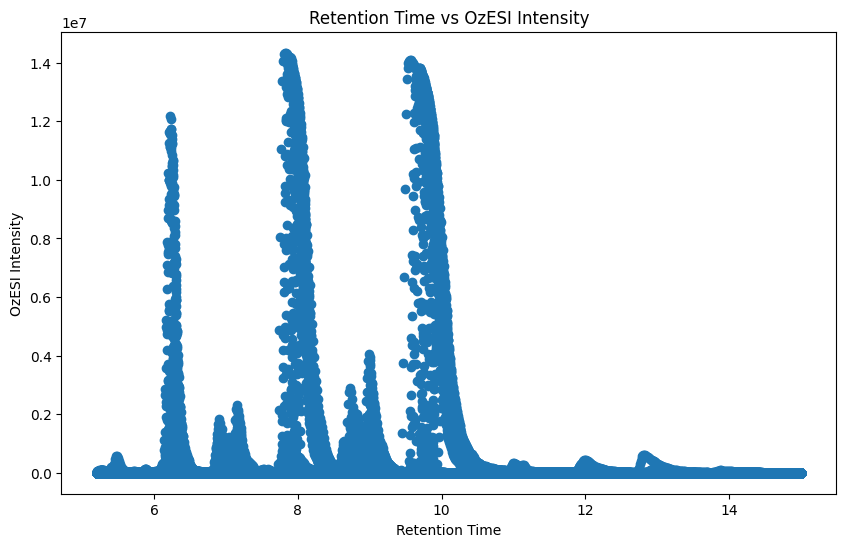

In [19]:


# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


# Pipeline for OzON Truth

# d1a to d1b take raw dataframe and Match Lipids

In [20]:
d1b = d1a.copy()

# Assuming df_MRM and d1b are already defined

# Create Match_Group in d1a if it doesn't exist
if 'Match_Group' not in d1a.columns:
    d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Copy Match_Group to d1b
d1b['Match_Group'] = d1a['Match_Group']

# Function to check if two ions are within the tolerance
def is_within_tolerance(ion1, ion2, tolerance=0.3):
    return abs(ion1 - ion2) <= tolerance

# Add a new column for Lipid in d1b
d1b['Lipid'] = None

# Iterate through each unique Match_Group in d1a
for group in d1a['Match_Group'].unique():
    # Extract a representative row for the current group from d1a
    group_row = d1a[d1a['Match_Group'] == group].iloc[0]

    # Find a matching lipid in df_MRM for the representative row
    for _, mrm_row in df_MRM.iterrows():
        if is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
            # Assign the lipid to all rows in the corresponding group in d1b
            d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
            break  # Stop searching once a match is found

# Display the updated d1b DataFrame
d1b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN
...,...,...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN


# Assign Correct_RT for each Lipid group is OzON to define ground truth RT for each lipid in each sample

In [21]:
d1c = d1b.copy()
#generalized method
def extract_details_from_sample_id(df, column_name='Sample_ID', new_columns=None):
    """
    Extracts specified details from the Sample_ID column and adds them as new columns.

    Args:
    df (pandas.DataFrame): The DataFrame containing the Sample_ID column.
    column_name (str): The name of the column to extract the details from. Default is 'Sample_ID'.
    new_columns (dict): A dictionary where keys are the names of new columns to be added, 
                        and values are lists of possible string values for those columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added columns.
    """
    # Check if new_columns is provided
    if new_columns is None or not isinstance(new_columns, dict):
        raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

    # Loop through each new column and its possible values
    for col, values in new_columns.items():
        # Create a regular expression pattern for each column
        pattern = f"(?P<{col}>{'|'.join(values)})"

        # Extract the matched pattern and create the new column
        df_extracted = df[column_name].str.extract(pattern)

        # Add the new column to the original DataFrame
        df = pd.concat([df, df_extracted[[col]]], axis=1)

    return df


new_columns = {'Biology': ['cortex', 'dienc', 'hippo','cereb'],
               'Genotype': ['5xFAD','WT'],
               'Cage': ['FAD231','FAD245' 'FAD249', 'FAD257','FAD263'],
               'Mouse': ['m1','m2','m3','m4','m5']}
d1c = extract_details_from_sample_id(d1c, new_columns=new_columns)
d1c

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2


In [22]:
d1c['Genotype'].unique()

array([nan, 'WT', '5xFAD'], dtype=object)

# Create group based off mouse cage genotype


In [23]:
import pandas as pd
d1d = d1c.copy()

def add_group_sample_column(df):
    """
    Adds a new column 'Group_Sample' to the DataFrame, assigning a unique group number 
    for each combination of Cage, Mouse, Genotype, Biology, and Lipid.

    Args:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with the added 'Group_Sample' column.
    """
    # Create the 'Group_Sample' column by assigning a group number for each combination
    df['Group_Sample'] = df.groupby(['Cage', 'Mouse', 'Genotype', 'Biology', 'Lipid']).ngroup()

    return df

# Usage Example:
# Assuming your DataFrame is named df
d1d = add_group_sample_column(d1c)
# add n_start column to d1d
d1d['n_start'] = None
d1d


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None


In [24]:
#print unique values of genotype
d1d['Genotype'].unique()

array([nan, 'WT', '5xFAD'], dtype=object)

Functions

In [25]:
# # Determine 'FAC'
# def determine_fac(lipid):
#     # Check if the lipid is a string
#     if isinstance(lipid, str):
#         if 'FA18:1' in lipid:
#             return 'FA18:1'
#         elif 'FA16:1' in lipid:
#             return 'FA16:1'
#     # Return None if lipid is not a string or doesn't match conditions
#     return None



def extract_tg(lipid):
    # Check if the lipid is a string
    if isinstance(lipid, str):
        pattern = r'TG\(\d+:\d+\)'
        matches = re.findall(pattern, lipid)
        return ', '.join(matches) if matches else None
    else:
        # Return None if lipid is not a string
        return None



def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell
    
def remove_tg_zero(lipid):
    # Check if the lipid is a string
    if isinstance(lipid, str):
        pattern = r'TG\(\d+:0\)'
        new_lipid = re.sub(pattern, '', lipid)
        # Clean up potential extra commas and spaces
        new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
        return new_lipid
    else:
        # Return the original value if it's not a string
        return lipid
    

# Define a function to initialize and calculate n-# values based on n-#_Start
def initialize_and_calculate_n_columns(row, db_aldehyde, db_pos_list):
    n_start = row['n-#_Start']
    for number in db_pos_list:
        if number >= n_start:
            aldehyde_ion = db_aldehyde.loc[db_aldehyde["DB_Position"] == number, "Aldehyde_Ion"].values[0]
            row[f'n-{number}'] = row["Parent_Ion"] - aldehyde_ion
        else:
            row[f'n-{number}'] = pd.NA
    return row





# df_db_pos codeblock to make OzON n-# reference

In [26]:
import pandas as pd
import re
import pandas as pd
from itertools import cycle
from itertools import product


# 1. Reading Data
OzON_Correct_RT = pd.read_csv('Projects/AMP/RT/AMP_OzON_RT.csv')
df_MRM_RT_correct = OzON_Correct_RT.copy()

# # 2. Filter for '54:1' in df_MRM_RT_correct
# tg_54_1_rows = df_MRM_RT_correct[df_MRM_RT_correct['Lipid'].str.contains('54:1')]
# print(tg_54_1_rows)
####
# 3. Initialize df_DB_aldehyde
df_DB_aldehyde = pd.DataFrame(columns=['DB_Position', 'Aldehyde_Ion'])
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position - 3))

## COPY df_MRM_RT_correct to df_db_pos ## 
df_db_pos = df_MRM_RT_correct.copy()



def expand_df_with_n_start(df, start_values):
    """
    Expands the DataFrame df by creating new rows for each value in start_values.
    Each new row is a copy of the original row but with a different value in the 'n_start' column.

    Args:
    df (pd.DataFrame): The original DataFrame.
    start_values (list): A list of values for the new 'n_start' column.

    Returns:
    pd.DataFrame: The expanded DataFrame.
    """
    # Create a new DataFrame with combinations of Lipid values and start_values
    expanded_combinations = pd.DataFrame(product(df['Lipid'].unique(), start_values), columns=['Lipid', 'n_start'])

    # Merge the expanded combinations with the original DataFrame
    expanded_df = expanded_combinations.merge(df, on='Lipid')

    return expanded_df


start_values = [3, 6, 9]  # User-defined start values
df_db_pos = expand_df_with_n_start(df_db_pos, start_values)



# Now df_db_pos_augmented contains duplicates of each row for each value in start_values


# Now df_db_pos includes additional rows with n-#_Start values of 3, 6, and 9 for each unique group




# 3. Add n-# columns to df_MRM_RT_correct
db_pos_list = [3, 6, 9, 12]
for number in db_pos_list:
    df_db_pos[f'n-{number}'] = pd.NA  # Initialize the new columns with NA

def calculate_n_values_with_adjustment(df, db_aldehyde, db_pos_list, user_start_values):
    """
    Calculates and adjusts the n-# values based on the n-#_Start value for each row in the DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame with the data.
    db_aldehyde (pd.DataFrame): DataFrame containing the Aldehyde Ion values.
    db_pos_list (list): List of db positions to consider.
    user_start_values (list): User-defined start values.

    Returns:
    pd.DataFrame: DataFrame with the calculated and adjusted n-# values.
    """
    for index, row in df.iterrows():
        # Find the index of n-#_Start in user_start_values list
        start_value_index = user_start_values.index(row['n_start'])

        for ozesi_position in db_pos_list:
            if row['n_start'] <= ozesi_position:
                # Calculate n-# value
                aldehyde_ion = db_aldehyde.loc[db_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]
                n_value = row["Parent_Ion"] - aldehyde_ion

                # Adjust the n-# value based on the position of n-#_Start in the user_start_values list
                adjustment = 2 * start_value_index
                df.at[index, f"n-{ozesi_position}"] = n_value - adjustment
            else:
                # Set n-# value to NaN
                df.at[index, f"n-{ozesi_position}"] = pd.NA

    return df

# Example usage
user_start_values = [3, 6, 9]  # User-defined start values
db_pos_list = [3, 6, 9, 12]
df_db_pos = calculate_n_values_with_adjustment(df_db_pos, df_DB_aldehyde, db_pos_list, user_start_values)




# # 6. Further Processing on df_db_pos
# # Calculate 'n-i' values
# for ozesi_position in db_pos_list:
#     aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]
#     df_db_pos[f"n-{ozesi_position}"] = df_db_pos["Parent_Ion"] - aldehyde_ion




# # List of DB positions to consider
# db_pos_list = [3, 6, 9, 12]

# # Example of setting n-#_Start (replace this with your actual logic to determine the n-#_Start value)
# df_db_pos['n-#_Start'] = [3, 6, 9]  # This is just an example, replace with your actual logic

# # Apply the function to each row
# df_db_pos = df_db_pos.apply(initialize_and_calculate_n_columns, axis=1, db_aldehyde=df_DB_aldehyde, db_pos_list=db_pos_list)

# #Extract the FAC
# df_db_pos['FAC'] = df_db_pos['Lipid'].apply(determine_fac)
# # Apply extract_tg to create the TG column
# df_db_pos['TG'] = df_db_pos['Lipid'].apply(extract_tg)

# Clean up the Lipid column
df_db_pos['Lipid'] = df_db_pos['Lipid'].apply(remove_tg_zero)

# # Apply sort_tg_values to sort TG values within each cell
# df_db_pos['TG'] = df_db_pos['TG'].apply(sort_tg_values)

# df_db_pos.to_excel(db_save_directory + 'FaceFats_Brain5xFAD_OzON.xlsx')
#reset index
df_db_pos.reset_index(drop=True, inplace=True)
#drop columns Unnamed: 0, New_ID, Match_Group and Group_Sample
df_db_pos.drop(columns=['Unnamed: 0'], inplace=True)

# #sort values by Sample_ID
# df_db_pos.sort_values(by=['Lipid','n-#_Start','Biology'], inplace=True)
#only keep Sample_ID containing str 11192023_5xFAD-m1-cereb-FAD231

#filter for lipid 18:2

## set the lipid to filter to check if working, dont use for real runs 
#df_db_pos = df_db_pos[df_db_pos['Sample_ID'].str.contains('11192023_5xFAD-m1-cereb-FAD231')]
# df_db_pos = df_db_pos[df_db_pos['Lipid'] == '18:3']
##

# Display the final DataFrame
#round RT to 2 decimal places
df_db_pos['Retention_Time'] = df_db_pos['Retention_Time'].round(2)
df_db_pos

# expanded_df = expanded_df[expanded_df['Lipid'] == '18:2']
# expanded_df



,Lipid,n_start,Biology,Cage,Correct_RT,Genotype,Match_Group,Max_Intensity,Mouse,New_ID,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,n-3,n-6,n-9,n-12
0,18:2,3,cereb,FAD231,7.51,5xFAD,1538.0,49647.402344,m1,18:2-FAD231-m1-5xFAD-cereb,49647.402344,447.4,183.0,7.51,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,421.4,379.4,337.4,295.4
1,18:2,3,cortex,FAD231,7.49,5xFAD,1540.0,98009.585938,m1,18:2-FAD231-m1-5xFAD-cortex,98009.585938,447.4,183.0,7.49,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,447.4 -> 183.0,421.4,379.4,337.4,295.4
2,18:2,3,dienc,FAD231,7.50,5xFAD,1542.0,65624.625000,m1,18:2-FAD231-m1-5xFAD-dienc,65624.625000,447.4,183.0,7.50,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,421.4,379.4,337.4,295.4
3,18:2,3,hippo,FAD231,7.52,5xFAD,1544.0,51662.863281,m1,18:2-FAD231-m1-5xFAD-hippo,51662.863281,447.4,183.0,7.49,11192023_5xFAD-m1-hippo-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,421.4,379.4,337.4,295.4
4,18:2,3,cereb,FAD231,7.51,5xFAD,1546.0,52146.882812,m2,18:2-FAD231-m2-5xFAD-cereb,52146.882812,447.4,183.0,7.51,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,421.4,379.4,337.4,295.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,22:6,9,hippo,FAD263,6.38,WT,1991.0,29986.402344,m4,22:6-FAD263-m4-WT-hippo,337.540039,495.4,183.0,7.62,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,495.4 -> 183.0,<NA>,<NA>,381.4,339.4
386,22:6,9,cereb,FAD263,7.60,WT,1993.0,11523.500977,m5,22:6-FAD263-m5-WT-cereb,11523.500977,495.4,183.0,7.51,11162023_WT-m5-cereb-FAD263_AMP_2x_0.05uMd216-...,495.4 -> 183.0,<NA>,<NA>,381.4,339.4
387,22:6,9,cortex,FAD263,7.56,WT,1995.0,4725.580566,m5,22:6-FAD263-m5-WT-cortex,1634.520142,495.4,183.0,6.18,11162023_WT-m5-cortex-FAD263_AMP_2x_0.05uMd216...,495.4 -> 183.0,<NA>,<NA>,381.4,339.4
388,22:6,9,dienc,FAD263,7.53,WT,1997.0,6352.140625,m5,22:6-FAD263-m5-WT-dienc,6352.140625,495.4,183.0,6.09,11162023_WT-m5-dienc-FAD263_AMP_2x_0.05uMd216-...,495.4 -> 183.0,<NA>,<NA>,381.4,339.4


# quick check to make sure data is correct

In [27]:
# d1c

# # ion_tolerance = 0.3

# # # Define the window variable for retention time
# # retention_time_window = 0.25

# # # Define the target values for Parent_Ion, Product_Ion, and Retention_Time
# # target_parent_ion = 792.8
# # target_product_ion = 603.5
# # target_retention_time = 15.8

# # # Filter the DataFrame for specified ions within tolerance and retention time within the window
# # filtered_rows = d1c[
# #     (d1c['Parent_Ion'] >= target_parent_ion - ion_tolerance) & 
# #     (d1c['Parent_Ion'] <= target_parent_ion + ion_tolerance) &
# #     (d1c['Product_Ion'] >= target_product_ion - ion_tolerance) & 
# #     (d1c['Product_Ion'] <= target_product_ion + ion_tolerance) &
# #     (d1c['Retention_Time'] >= target_retention_time - retention_time_window) & 
# #     (d1c['Retention_Time'] <= target_retention_time + retention_time_window)
# # ]

# # filtered_rows

# #drop columns group_sample and Match_Group
# d1d.drop(columns=['Group_Sample'], inplace=True)
d1d


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start
402,227.1,183.0,5.205533,40.940002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
403,227.1,183.0,5.218450,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
404,227.1,183.0,5.231367,40.920002,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
405,227.1,183.0,5.244283,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
406,227.1,183.0,5.257217,40.880001,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0,0,NaN,NaN,NaN,NaN,NaN,-1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120066,533.5,183.0,14.935600,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120067,533.5,183.0,14.948517,41.300003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120068,533.5,183.0,14.961433,41.280003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None
5120069,533.5,183.0,14.974350,41.340004,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,2267,NaN,hippo,5xFAD,FAD257,m2,-1,None


Filter through filtered_d1 based on matched OzOFF lipids df_db_pos for n-7 and n-9 values

# NOTE TO SELF, don't filter through every data point, only filter through each group

In [28]:
import pandas as pd
from tqdm.notebook import tqdm

from tqdm import tqdm

# User input for double bond locations
double_bond_locations = ['n-3', 'n-6', 'n-9', 'n-12']  # Example input, can be changed as needed

tolerance = 0.3
retention_time_tolerance = 0.275  # Adjustable value

# Define the columns to match
columns_to_match = ['Cage', 'Mouse', 'Genotype', 'Biology']

# Re-initializing an empty DataFrame for filtered_d2
d2 = pd.DataFrame()

# Iterating through df_db_pos
for index, row in tqdm(df_db_pos.iterrows(), total=df_db_pos.shape[0]):
    ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
    product_ion = row['Product_Ion']
    n_start_value = row['n_start']  # Capture the n_start value from df_db_pos

    # Collect parent ions for specified double bond locations
    parent_ions = {location: row[location] for location in double_bond_locations}

    lipid_name = row['Lipid']  # Extracting Lipid name from df_db_pos

    # Define the retention time window
    lower_bound_time = ground_truth_retention_time - retention_time_tolerance
    upper_bound_time = ground_truth_retention_time + retention_time_tolerance

    # Define the tolerance for Product ions
    lower_bound_ion = product_ion - tolerance
    upper_bound_ion = product_ion + tolerance

    # Filtering d1d within the specified window and matching ions with tolerance
    matches = d1d[(d1d['Retention_Time'] >= lower_bound_time) & 
                  (d1d['Retention_Time'] <= upper_bound_time) &
                  (d1d['OzESI_Intensity'] >= 5) &
                  (d1d['Product_Ion'] >= lower_bound_ion) &
                  (d1d['Product_Ion'] <= upper_bound_ion) &
                  (d1d[columns_to_match].eq(row[columns_to_match])).all(axis=1)]

    # Initialize 'db', 'Lipid', and 'n_start' columns
    matches['db'] = ''
    matches['Lipid'] = lipid_name
    matches['n_start'] = n_start_value  # Add the n_start value

    # Dynamic matching for double bond locations
    for location, parent_ion in parent_ions.items():
        lower_bound_parent_ion = parent_ion - tolerance
        upper_bound_parent_ion = parent_ion + tolerance
        matches.loc[(matches['Parent_Ion'] >= lower_bound_parent_ion) & 
                    (matches['Parent_Ion'] <= upper_bound_parent_ion), 'db'] = location

    # Append the matching rows to d2
    d2 = d2.append(matches)



  0%|          | 0/390 [00:00<?, ?it/s]/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [29]:
# Resetting the index of the new DataFrame
d2 = d2.reset_index(drop=True)

# Display the first few rows of the new DataFrame
d2

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,db
0,227.1,183.0,7.246950,41.660004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,26,18:2,cereb,5xFAD,FAD231,m1,-1,3,
1,227.1,183.0,7.259867,41.660004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,26,18:2,cereb,5xFAD,FAD231,m1,-1,3,
2,227.1,183.0,7.272800,41.700005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,26,18:2,cereb,5xFAD,FAD231,m1,-1,3,
3,227.1,183.0,7.285717,41.700005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,26,18:2,cereb,5xFAD,FAD231,m1,-1,3,
4,227.1,183.0,7.298633,42.860004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,26,18:2,cereb,5xFAD,FAD231,m1,-1,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976411,533.5,183.0,6.601933,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,533.5 -> 183.0,2251,22:6,hippo,WT,FAD263,m5,-1,9,
976412,533.5,183.0,6.614867,41.400002,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,533.5 -> 183.0,2251,22:6,hippo,WT,FAD263,m5,-1,9,
976413,533.5,183.0,6.627783,41.380001,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,533.5 -> 183.0,2251,22:6,hippo,WT,FAD263,m5,-1,9,
976414,533.5,183.0,6.640700,41.360004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,533.5 -> 183.0,2251,22:6,hippo,WT,FAD263,m5,-1,9,


In [30]:
d2['Genotype'].unique()

array(['5xFAD', 'WT'], dtype=object)

# CHeck Rt of a specific lipid

In [31]:
# # Filter the DataFrame based on the specified conditions

# # Filter the DataFrame based on the specified conditions
# filtered_df = d2[(d2['Lipid'].str.contains('TG\(54:2\)')) & (d2['db'] == 'n-10') & d2['Sample_ID'].str.contains('DOD73')]

# # Print the filtered values
# filtered_df

# Determine Groups Brain Region or Liver (Biology), Genotype, FAC and remove TGs with zero double bonds

In [150]:
# Creating filtered_d3 from filtered_d2
d3 = d2.copy()

# Dropping rows where 'db' column is blank
d3 = d3[d3['db'] != '']

# # Function to determine the value for the Biology and Genotype column
# def extract_biology(sample_id):
#     for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
#         if term in sample_id.lower():
#             return term
#     return None

# # Apply the function to the Sample_ID column to create the Biology and Genotype column
# d3['Biology'] = d3['Sample_ID'].apply(extract_biology)
# d3['Genotype'] = d3['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')
d3

# # Function to remove the first TG if there are two TGs
# def remove_first_tg(lipid):
#     tg_parts = lipid.split(',')
#     if len(tg_parts) > 1:
#         return '[' + tg_parts[1]
#     else:
#         return lipid
    
# # Function to determine the value for the FAC column
# def determine_fac(lipid):
#     if 'FA18:1' in lipid:
#         return 'FA18:1'
#     elif 'FA16:1' in lipid:
#         return 'FA16:1'
#     else:
#         return None  # or some other default value

# # Apply the function to the Lipid column to create the FAC column
# d3['FAC'] = d3['Lipid'].apply(determine_fac)



# # Function to extract TG values
# def extract_tg(lipid):
#     # Regular expression pattern to match TG(##:#) or similar patterns
#     pattern = r'TG\(\d+:\d+\)'
#     matches = re.findall(pattern, lipid)
#     return ', '.join(matches) if matches else None

# # Apply the function to the Lipid column to create the TG column
# d3['TG'] = d3['Lipid'].apply(extract_tg)




# # Function to sort TG values within a cell
# def sort_tg_values(tg_cell):
#     if not pd.isna(tg_cell) and ', ' in tg_cell:
#         tg_list = tg_cell.split(', ')
#         tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
#         return ', '.join(tg_list_sorted)
#     else:
#         return tg_cell

# # Function to remove TG(##:0) patterns from the Lipid string
# def remove_tg_zero(lipid):
#     # Pattern to match TG(##:0)
#     pattern = r'TG\(\d+:0\)'
#     # Remove TG(##:0) patterns
#     new_lipid = re.sub(pattern, '', lipid)
#     # Remove any extra commas and spaces left after removal
#     new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
#     return new_lipid


# d3['Lipid'] = d3['Lipid'].apply(remove_tg_zero)
# Apply the function to the TG column
# d3['TG'] = d3['TG'].apply(sort_tg_values)
# d3 = d3.sort_values(by=['FAC', 'TG'])



# Sorting by 'Biology and Genotype' and then by 'Lipid'
d3 = d3.sort_values(by=['Biology','Genotype', 'Lipid','db','n_start'])

grouped_cluster_data = d3.groupby(['Lipid','db','Biology','Genotype','Sample_ID','n_start','Mouse'])
#add group number to each to a new column called Group
d3['Group'] = grouped_cluster_data.ngroup()
d3


d3
# #print group with highest max intensity

# # look at d3 Lipid 18:2 and Group 2 and db = n-6

# filtered = d3[d3['Lipid'] == '18:2'] 
# filtered = filtered[filtered['Group'] == 1]
# filtered = filtered[filtered['db'] == 'n-6']
# filtered.head(60)


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,db,Group
1181,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0
1182,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0
1183,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0
1184,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0
1185,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974933,381.3,183.0,6.597067,41.440002,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372
974934,381.3,183.0,6.609983,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372
974935,381.3,183.0,6.622900,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372
974936,381.3,183.0,6.635817,41.500004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372


# GMM

In [33]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming d3 is your DataFrame
d4 = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group in the 'Group' column
for group_id, group in tqdm(d3.groupby(['Group']), desc="Clustering Groups"):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.00005

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 0)]

    # Check if the filtered group is empty or has less than 2 samples
    if filtered_group.empty or len(filtered_group) < 2:
        continue

    # Reshape the 'Retention_Time' data for GMM
    retention_times = filtered_group[['Retention_Time']].values

    # Apply GMM clustering to this specific group
    # Note: Adjust the number of components (n_components) as needed
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

    # Get the cluster labels
    labels = gmm.predict(retention_times)

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    d4 = pd.concat([d4, filtered_group])

# The resulting DataFrame, d4, now contains separately clustered data for each group


Clustering Groups: 100%|██████████| 373/373 [04:40<00:00,  1.33it/s]


## Check GMM Clusters

In [34]:
# Filter the DataFrame based on the specified conditions
d5 = d4.copy()

# Filter the DataFrame based on the specified conditions
filtered_df = d5[(d5['Lipid'].str.contains('TG\(50:3\)')) & (d5['db'] == 'n-9') & d5['Sample_ID'].str.contains('DOD73')]

# Print the filtered values
filtered_df
d5
# d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,db,Group,Cluster_Label
1181,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1182,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1183,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1184,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1185,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974933,381.3,183.0,6.597067,41.440002,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974934,381.3,183.0,6.609983,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974935,381.3,183.0,6.622900,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974936,381.3,183.0,6.635817,41.500004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0


# Single GMM

In [35]:
# Assuming d3 is your DataFrame
d_single = pd.DataFrame()  # Initialize an empty DataFrame to store the result for a single group

# Specify the group to perform GMM on
specified_group = 0  # Replace 'Your_Group_ID' with the desired group identifier

# Check if the specified group exists in d3
if specified_group in d3['Group'].unique():
    # Filter the DataFrame for the specified group
    group = d3[d3['Group'] == specified_group]

    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.00005

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 0)]

    # Proceed only if the filtered group is not empty and has more than 1 sample
    if not filtered_group.empty and len(filtered_group) >= 2:
        # Reshape the 'Retention_Time' data for GMM
        retention_times = filtered_group[['Retention_Time']].values

        # Apply GMM clustering to this specific group
        # Note: Adjust the number of components (n_components) as needed
        gmm = GaussianMixture(n_components=3, covariance_type='full').fit(retention_times)

        # Get the cluster labels
        labels = gmm.predict(retention_times)

        # Add the cluster labels to the filtered group
        filtered_group['Cluster_Label'] = labels

        # Save the clustered group to d_single DataFrame
        d_single = filtered_group

else:
    print(f"Group '{specified_group}' not found in the DataFrame.")

# The resulting DataFrame, d_single, now contains clustered data for the specified group


# Plot GMM CLuster Check for specific lipid

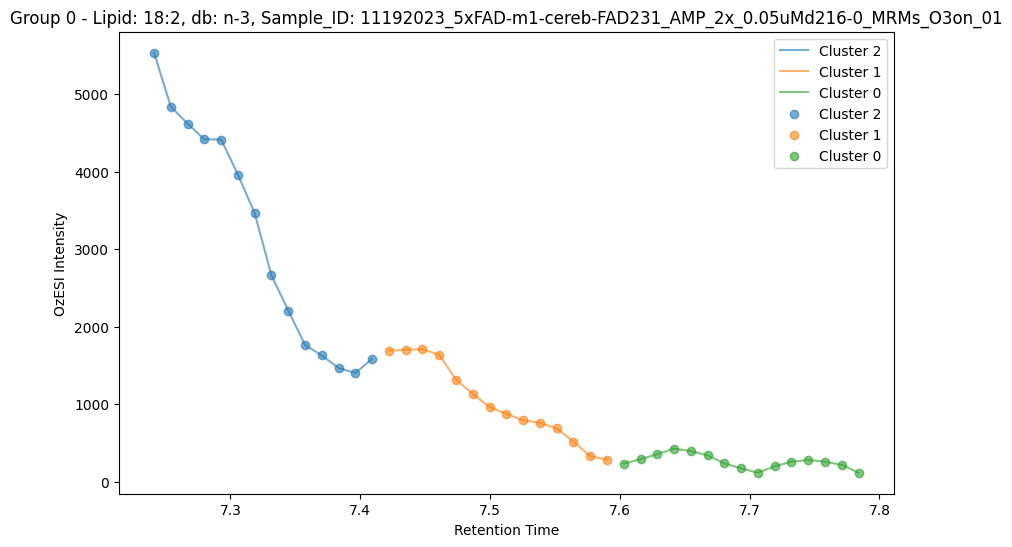

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,db,Group,Cluster_Label
1181,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1182,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1183,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1184,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1185,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1186,421.4,183.0,7.305850,3961.720215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1187,421.4,183.0,7.318783,3463.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1188,421.4,183.0,7.331700,2660.960205,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1189,421.4,183.0,7.344617,2207.760254,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2
1190,421.4,183.0,7.357533,1764.060181,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,2


In [36]:
import matplotlib.pyplot as plt

d_single = d_single.sort_values(by=['Lipid','db','Retention_Time'])
threshold_value = 50  # Replace 1000 with the user-defined threshold value
d_single = d_single[d_single['OzESI_Intensity'] >= threshold_value]



# Plotting the filtered data with colors based on Cluster_Label
plt.figure(figsize=(10, 6))

# Extracting Lipid, db, and Sample_ID for the title (assuming they are consistent within the group)
lipid = d_single['Lipid'].iloc[0] if not d_single.empty else 'N/A'
db = d_single['db'].iloc[0] if not d_single.empty else 'N/A'
sample_id = d_single['Sample_ID'].iloc[0] if not d_single.empty else 'N/A'

# Iterate through each unique value in the Cluster_Label column
for label in d_single['Cluster_Label'].unique():
    # Filter the DataFrame for each label
    cluster_df = d_single[d_single['Cluster_Label'] == label]
    
    # Plot each cluster with a different color
    plt.scatter(cluster_df['Retention_Time'], cluster_df['OzESI_Intensity'], alpha=0.6, label=f'Cluster {label}')
    plt.plot(cluster_df['Retention_Time'], cluster_df['OzESI_Intensity'], alpha=0.6, label=f'Cluster {label}')
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title(f'Group {specified_group} - Lipid: {lipid}, db: {db}, Sample_ID: {sample_id}')
plt.legend()
plt.show()

d_single


# Plot whole spectrum to make sure data is correct

In [37]:
# # Assuming clustered_data is your DataFrame with the necessary data

# # Plotting the Intensity vs Retention Time
# plt.figure(figsize=(10, 6))
# plt.scatter(d4['Retention_Time'], d4['OzESI_Intensity'])

# # Adding labels and title to the plot
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.title('Retention Time vs OzESI Intensity')

# # Displaying the plot
# plt.show()


# Save GMM Results

In [38]:
# save_gmm_results_directory = 'Projects/FaceFats/results/GMM_results/'
# save_gmm_results_name = 'FF_Brain5xFAD_OzON_Truth_GMM_results_14Jan24.csv'
# # d5.to_csv(save_gmm_results_directory + save_gmm_results_name)
# def save_csv_with_increment(df, directory, filename):
#     # Check if the directory exists, if not, create it
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     base, extension = os.path.splitext(filename)
#     counter = 1
#     new_filename = filename

#     # Check if file exists and increment the counter until an unused filename is found
#     while os.path.isfile(os.path.join(directory, new_filename)):
#         new_filename = f"{base}_{counter}{extension}"
#         counter += 1

#     # Save the dataframe to the new path
#     df.to_csv(os.path.join(directory, new_filename), index=False)
#     print(f"File saved as: {new_filename}")

# # Example usage
# save_csv_with_increment(d5, save_gmm_results_directory, save_gmm_results_name)

# load GMM

In [39]:
# d_load = pd.read_csv('Projects/AMP/results/GMM_results/AMP_GMM.csv')
# d_load

In [128]:
d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,db,Group,Cluster_Label
1181,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1182,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1183,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1184,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
1185,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,FAD231,m1,-1,3,n-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974933,381.3,183.0,6.597067,41.440002,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974934,381.3,183.0,6.609983,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974935,381.3,183.0,6.622900,41.460003,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0
974936,381.3,183.0,6.635817,41.500004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,381.3 -> 183.0,823,22:6,hippo,WT,FAD263,m5,-1,9,n-9,372,0


# Make MaxI column so we can filter based off that later

In [281]:
d6 = d5.copy()
d6

import pandas as pd

def Make_MaxI(df):
    """
    Creates a 'Max_Intensity' column in the DataFrame, containing the maximum OzESI_Intensity
    for each group based on Mouse, Genotype, Biology, db, Lipid, and FAC.

    Args:
        df (pandas.DataFrame): The DataFrame to process.

    Returns:
        pandas.DataFrame: The DataFrame with the new Max_Intensity column.
    """
    # Grouping the DataFrame by specified columns and finding the max intensity for each group
    max_intensity_per_group = df.groupby(['Mouse', 'Genotype', 'Biology', 'db', 'Lipid' ,'n_start','Cluster_Label'])['OzESI_Intensity'].transform('max').round(0)

    # Assigning the max intensity to the Max_Intensity column
    df['Max_Intensity'] = max_intensity_per_group

    return df

#drop group_sample column
d6.drop(columns=['Group_Sample'], inplace=True)
import pandas as pd

def drop_maxi_nan(df, intensity_threshold=None):
    """
    Drops rows from the DataFrame where the Max_Intensity column contains NaN values or
    is below a specified threshold.

    Args:
    df (pd.DataFrame): The DataFrame to process.
    intensity_threshold (float, optional): The threshold for Max_Intensity. Rows with Max_Intensity
                                           below this value will be dropped. If None, no threshold filtering is applied.

    Returns:
    pd.DataFrame: The DataFrame with rows having NaN or below-threshold in Max_Intensity dropped.
    """
    # Drop rows where 'Max_Intensity' is NaN
    df_cleaned = df.dropna(subset=['Max_Intensity'])

    # Filter rows based on the intensity threshold, if provided
    if intensity_threshold is not None:
        df_cleaned = df_cleaned[df_cleaned['Max_Intensity'] >= intensity_threshold]

    return df_cleaned




# Grouping and creating a new column for group indices
d6['group_n'] = d6.groupby(['Mouse', 'Genotype', 'Biology', 'db', 'Lipid', 'n_start','Cluster_Label']).ngroup()
d6['Group'] = d6.groupby(['Mouse', 'Genotype', 'Biology', 'db', 'Lipid', 'n_start','Cluster_Label']).ngroup()

d6 = Make_MaxI(d6)
# Usage example:
d6 = drop_maxi_nan(d6, intensity_threshold=400)

d6

# Assuming d6a is your DataFrame and it's already loaded
group_1_data = d6[d6['group_n'] == 203]
#sort by retention time
group_1_data = group_1_data.sort_values(by=['Retention_Time'])

# Now, group_1_data contains only the rows where the Group column value is 1
group_1_data

# # # # print max OzESI_Intensity for group_1_data
# # # group_1_data['OzESI_Intensity'].max()
# # # Example to inspect groups and their max OzESI_Intensity
# # grouped = d6.groupby(['Mouse', 'Genotype', 'Biology', 'db', 'Lipid', 'n_start', 'Cluster_Label'])

# # for name, group in grouped:
# #     max_ozesi_intensity = group['OzESI_Intensity'].max()
# #     max_intensity = group['Max_Intensity'].max()
# #     difference = abs(max_ozesi_intensity - max_intensity)

# #     if difference > 5:
# #         print(f"Group: {name}")
# #         print(f"Max OzESI Intensity: {max_ozesi_intensity}")
# #         print(f"Max Intensity: {max_intensity}")
# #         print(f"Difference: {difference}")
# #         print("---")

# # Assuming group_1_data is already defined and filtered for Group 1 data as in previous steps
# # For the sake of demonstration, let's create a mock DataFrame to simulate group_1_data
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Mock data creation for demonstration
# np.random.seed(0)  # For reproducibility
# data = {
#     'Retention_Time': np.linspace(5, 15, 100),
#     'OzESI_Intensity': np.random.normal(loc=1000, scale=300, size=100)  # Normal distribution
# }

# group_1_data = pd.DataFrame(data)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(group_1_data['Retention_Time'], group_1_data['OzESI_Intensity'], color='blue', alpha=0.6, label='OzESI Intensity')
# plt.title('Retention Time vs OzESI Intensity for Group 1')
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.legend()
# plt.grid(True)
# plt.show()




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,n_start,db,Group,Cluster_Label,group_n,Max_Intensity
523765,447.4,183.0,8.014817,49.700005,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
526103,447.4,183.0,8.014833,1202.340088,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
523766,447.4,183.0,8.027750,47.820004,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
526104,447.4,183.0,8.027750,964.580078,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
523767,447.4,183.0,8.040667,41.600002,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526142,447.4,183.0,8.518733,41.220001,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
523805,447.4,183.0,8.531633,41.520004,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
526143,447.4,183.0,8.531650,41.200005,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0
523806,447.4,183.0,8.544550,41.480003,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,FAD263,m4,3,n-3,203,0,203,1202.0


# Obtain ground truth difference for each RT cluster by comparing the Max Intensity RT for each cluster to the ground truth. Keep cluster closest to the ground truth. 

In [282]:
d7 = d6.copy()
df_all_clusters = d6.copy()

# def get_ground_truth_diff(row, df_db_pos):
#     # Get the ground truth Retention_Time for the Lipid
#     ground_truth_rt = df_db_pos[df_db_pos['Lipid'] == row['Lipid']]['Retention_Time'].iloc[0]
#     # Calculate the absolute difference
#     return abs(row['Retention_Time'] - ground_truth_rt)

# d7['Ground_Truth_Dif'] = d7.apply(get_ground_truth_diff, args=(df_db_pos,), axis=1)


##########
# Step 1: Define a function to find the peak RT for each cluster
def get_peak_rt(group_df):
    peak_rt_row = group_df.loc[group_df['OzESI_Intensity'].idxmax()]
    return peak_rt_row['Retention_Time']

# Step 2: Group by 'Group' and 'Cluster_Label' to apply the function
cluster_peak_rt = d7.groupby(['Group', 'Cluster_Label']).apply(get_peak_rt)

# Step 3: Merge the peak RT values back into d7
d7 = d7.merge(cluster_peak_rt.rename('Cluster_RT'), on=['Group', 'Cluster_Label'], how='left')

import numpy as np

def get_cluster_rt_ground_truth_diff(row, df_db_pos):
    # Filter df_db_pos for matching Lipid
    filtered_df = df_db_pos[df_db_pos['Lipid'] == row['Lipid']]

    # Check if filtered_df is empty
    if filtered_df.empty:
        return np.nan  # Or return another appropriate value

    # Get the ground truth Retention_Time for the Lipid
    ground_truth_rt = filtered_df['Retention_Time'].iloc[0]

    # Calculate the absolute difference with Cluster_RT
    return abs(row['Cluster_RT'] - ground_truth_rt)

# Apply this function to each row of d7 to calculate the ground truth difference for Cluster_RT
d7['Cluster_Ground_Truth_Dif'] = d7.apply(get_cluster_rt_ground_truth_diff, args=(df_db_pos,), axis=1)



import pandas as pd

def cluster_filter(d7):
    """
    Filters the DataFrame based on the minimum Cluster_Ground_Truth_Dif within each group.

    Args:
    d7 (pd.DataFrame): The DataFrame to be filtered.

    Returns:
    pd.DataFrame: Filtered DataFrame with rows corresponding to the winning cluster in each group.
    """
    d7a = pd.DataFrame()

    for group, group_df in d7.groupby('Group'):
        # Check if all values in 'Cluster_Ground_Truth_Dif' are NaN
        if group_df['Cluster_Ground_Truth_Dif'].isna().all():
            continue  # Skip this group as there's no valid minimum difference

        idx_lowest_dif = group_df['Cluster_Ground_Truth_Dif'].idxmin()

        # Further, ensure idx_lowest_dif is not NaN
        if pd.isna(idx_lowest_dif):
            continue

        winning_cluster = group_df.loc[idx_lowest_dif, 'Cluster_Label']
        winning_cluster_rows = group_df[group_df['Cluster_Label'] == winning_cluster]
        d7a = d7a.append(winning_cluster_rows)

    return d7a

# Usage example:
# d7 = ... (Your DataFrame)
d7a = cluster_filter(d7)



def filter_groups_by_intensity(df):
    final_df = pd.DataFrame()
    
    # Iterate through each group
    for group, group_df in df.groupby('Group'):
        # Include the group if its max intensity is greater than 300
        if group_df['Max_Intensity'].max() > 100:
            final_df = final_df.append(group_df)

    return final_df

#drop column Match_Group
d7a.drop(columns=['Match_Group'], inplace=True)

# Example usage:
d7b = filter_groups_by_intensity(d7a)
d7b


    

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Lipid,Biology,Genotype,Cage,Mouse,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif
0,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.241250,0.268750
1,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.241250,0.268750
2,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.241250,0.268750
3,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.241250,0.268750
4,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.241250,0.268750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,425.4,183.0,6.594800,127.840012,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.284717,0.214717
7711,425.4,183.0,6.607733,141.160004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.284717,0.214717
7712,425.4,183.0,6.620650,167.220016,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.284717,0.214717
7713,425.4,183.0,6.633567,170.560013,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.284717,0.214717


In [283]:
#round RT to 2 decimal places and also  Cluster_RT and Cluster Ground Truth
#round OzESI to 0 decimal places
d7b['OzESI_Intensity'] = d7b['OzESI_Intensity'].round(0)
d7b['Retention_Time'] = d7b['Retention_Time'].round(2)
d7b['Cluster_RT'] = d7b['Cluster_RT'].round(2)
d7b['Cluster_Ground_Truth_Dif'] = d7b['Cluster_Ground_Truth_Dif'].round(2)


d7b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Lipid,Biology,Genotype,Cage,Mouse,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif
0,421.4,183.0,7.24,5535.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.24,0.27
1,421.4,183.0,7.25,4840.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.24,0.27
2,421.4,183.0,7.27,4620.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.24,0.27
3,421.4,183.0,7.28,4418.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.24,0.27
4,421.4,183.0,7.29,4415.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,18:2,cereb,5xFAD,FAD231,m1,3,n-3,1,0,1,5535.0,7.24,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,425.4,183.0,6.59,128.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.28,0.21
7711,425.4,183.0,6.61,141.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.28,0.21
7712,425.4,183.0,6.62,167.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.28,0.21
7713,425.4,183.0,6.63,171.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,22:6,hippo,WT,FAD263,m5,6,n-6,298,0,298,554.0,6.28,0.21


# Set Peak Boundaries using Peak Width at % of Peak Height

In [284]:
# Assuming d7 is already defined
d8 = d7.copy()

# Define the directory where you want to save the plots
save_directory = 'Projects/FaceFats/plots/peak_check/width/'
os.makedirs(save_directory, exist_ok=True)

# Setting parameters for peak finding
peak_width_fraction = 0.01
peak_width_fraction_large = 0.01
peak_width_intensity_threshold = 2000

# Function to calculate peak boundaries
def calculate_peak_boundaries(intensities, times, peak_max_index):
    peak_max_intensity = intensities[peak_max_index]
    if peak_max_intensity > peak_width_intensity_threshold:
        intensity_threshold = peak_max_intensity * peak_width_fraction_large
    else:
        intensity_threshold = peak_max_intensity * peak_width_fraction

    left_indices = np.where(intensities[:peak_max_index] < intensity_threshold)[0]
    right_indices = np.where(intensities[peak_max_index:] < intensity_threshold)[0] + peak_max_index

    peak_start = times[left_indices[-1]] if len(left_indices) > 0 else times[0]
    peak_end = times[right_indices[0]] if len(right_indices) > 0 else times[-1]

    return peak_start, peak_end

def plot_peak_and_boundaries(group_data, group, cluster_label, save_dir, peak_width_fraction=0.2):
    
    times = group_data['Retention_Time'].values
    intensities = group_data['OzESI_Intensity'].values
    peak_max_index = np.argmax(intensities)
    peak_max_intensity = intensities[peak_max_index]
    peak_start, peak_end = calculate_peak_boundaries(intensities, times, peak_max_index)

    # Extract additional information for the title
    lipid = group_data.iloc[0]['Lipid']
    biology = group_data.iloc[0]['Biology']
    genotype = group_data.iloc[0]['Genotype']
    db = group_data.iloc[0]['db']
    sample_id = group_data.iloc[0]['Sample_ID']

    # # Plotting
    # plt.figure(figsize=(10, 6))
    # plt.plot(times, intensities, label='Intensity')
    # plt.scatter(times[peak_max_index], intensities[peak_max_index], color='red', label='Peak', zorder=5)
    # if peak_max_intensity > peak_width_intensity_threshold:
    #     plt.axvline(peak_start, color='green', linestyle='--', label=f'Peak Start (Width at {peak_width_fraction_large*100:.0f}%)')
    #     plt.axvline(peak_end, color='blue', linestyle='--', label=f'Peak End (Width at {peak_width_fraction_large*100:.0f}%)')
    # else:
    #     plt.axvline(peak_start, color='green', linestyle='--', label=f'Peak Start (Width at {peak_width_fraction*100:.0f}%)')
    #     plt.axvline(peak_end, color='blue', linestyle='--', label=f'Peak End (Width at {peak_width_fraction*100:.0f}%)')
    # plt.xlabel('Retention Time')
    # plt.ylabel('OzESI Intensity')
    # plt.title(f'{group}, {cluster_label}, {lipid}, {biology}, {genotype}, {sample_id}, {db}')
    # plt.legend()

    # filename = f'{group}, {cluster_label}, {lipid}, {biology}, {genotype}, {sample_id}, {db}.png'
    # # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')
    # # plt.show()
    # plt.close()

# Iterating over groups and clusters and plotting peaks
for (group, cluster_label), group_df in d8.groupby(['Group', 'Cluster_Label']):
    group_df_sorted = group_df.sort_values(by='Retention_Time')
    peak_max_index = np.argmax(group_df_sorted['OzESI_Intensity'].values)
    peak_start, peak_end = calculate_peak_boundaries(group_df_sorted['OzESI_Intensity'].values, 
                                                     group_df_sorted['Retention_Time'].values, 
                                                     peak_max_index)

    # Update d8 with peak boundaries
    d8.loc[(d8['Group'] == group) & (d8['Cluster_Label'] == cluster_label), 'RT_Start'] = peak_start.round(2)
    d8.loc[(d8['Group'] == group) & (d8['Cluster_Label'] == cluster_label), 'RT_End'] = peak_end.round(2)

    # Plot and save peak analysis with the correct peak_width_fraction
    plot_peak_and_boundaries(group_df_sorted, group, cluster_label, save_directory, peak_width_fraction)

# Now the plots will use the peak_width_fraction of 0.22 as intended

# Display the updated DataFrame
d8




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End
0,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.24125,0.26875,7.24,7.78
1,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.24125,0.26875,7.24,7.78
2,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.24125,0.26875,7.24,7.78
3,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.24125,0.26875,7.24,7.78
4,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.24125,0.26875,7.24,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,381.3,183.0,6.274067,245.840012,11192023_5xFAD-m1-hippo-FAD231_AMP_2x_0.05uMd2...,381.3 -> 183.0,830,22:6,hippo,5xFAD,...,9,n-9,55,0,55,1072.0,5.84770,0.22230,5.80,6.33
8136,381.3,183.0,6.286983,173.200012,11192023_5xFAD-m1-hippo-FAD231_AMP_2x_0.05uMd2...,381.3 -> 183.0,830,22:6,hippo,5xFAD,...,9,n-9,55,0,55,1072.0,5.84770,0.22230,5.80,6.33
8137,381.3,183.0,6.299900,217.780014,11192023_5xFAD-m1-hippo-FAD231_AMP_2x_0.05uMd2...,381.3 -> 183.0,830,22:6,hippo,5xFAD,...,9,n-9,55,0,55,1072.0,5.84770,0.22230,5.80,6.33
8138,381.3,183.0,6.312817,233.280014,11192023_5xFAD-m1-hippo-FAD231_AMP_2x_0.05uMd2...,381.3 -> 183.0,830,22:6,hippo,5xFAD,...,9,n-9,55,0,55,1072.0,5.84770,0.22230,5.80,6.33


# Adjust new RTs based off peak width % calc

In [285]:
d9 = d8.copy()
d9
# Initialize an empty DataFrame to store the filtered results
filtered_d9 = pd.DataFrame()

# Iterate over each group-cluster pair
for (group, cluster_label), group_df in d9.groupby(['Group', 'Cluster_Label']):
    # Get the RT_Start and RT_End values for the current group-cluster pair
    rt_start = group_df['RT_Start'].iloc[0]
    rt_end = group_df['RT_End'].iloc[0]

    # Filter the DataFrame for rows where Retention_Time is within the start and end window
    within_window = group_df[(group_df['Retention_Time'] >= rt_start) & (group_df['Retention_Time'] <= rt_end)]

    # Append the filtered data to the results DataFrame
    filtered_d9 = pd.concat([filtered_d9, within_window])

# Assign the filtered DataFrame back to d9
d9 = filtered_d9

# Display the filtered DataFrame
d9


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End
0,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
1,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
2,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
3,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
4,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,425.4,183.0,6.594800,127.840012,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7711,425.4,183.0,6.607733,141.160004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7712,425.4,183.0,6.620650,167.220016,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7713,425.4,183.0,6.633567,170.560013,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65


# Dont need? Add Clusters back for a specific group because GMM did not Cluster Properly

In [286]:
# def add_clusters(d9, df_all_clusters, groups):
#     # Iterate over the list of group numbers
#     for group in groups:
#         # Filter df_all_clusters for the current group
#         group_data = df_all_clusters[df_all_clusters['Group'] == group]

#         # Append the data from the current group back to d9
#         d9 = pd.concat([d9, group_data])

#     return d9

# def merge_clusters(df, groups):
#     # Initialize an empty DataFrame for updated groups
#     updated_groups_df = pd.DataFrame()

#     # Iterate over the list of group numbers
#     for group in groups:
#         # Filter the DataFrame for the current group
#         group_data = df[df['Group'] == group]

#         # Change all Cluster_Labels in the group to '4'
#         group_data['Cluster_Label'] = 4

#         # Sort the group data by Retention_Time
#         group_data = group_data.sort_values(by='Retention_Time')

#         # Set the new min and max Retention_Time as RT_Start and RT_End
#         if not group_data.empty:
#             rt_start = group_data['Retention_Time'].min()
#             rt_end = group_data['Retention_Time'].max()
#             group_data['RT_Start'] = rt_start
#             group_data['RT_End'] = rt_end

#         # Append updated group data to the temporary DataFrame
#         updated_groups_df = pd.concat([updated_groups_df, group_data])

#     # Update the original DataFrame: Remove the old groups data
#     df_updated = df[~df['Group'].isin(groups)]

#     # Append the updated groups data to the original DataFrame
#     df_updated = pd.concat([df_updated, updated_groups_df])

#     return df_updated

# # Example usage
# groups_to_add = adjusted_list # Replace with the desired list of group numbers
# d9 = add_clusters(d9, df_all_clusters, groups_to_add)
# d9 = merge_clusters(d9, groups_to_add)


# Manually adjust RTs

In [287]:

def Peak_Adjust(d9, adjust_specs):
    adjusted_df = d9.copy()

    for spec in adjust_specs:
        group = spec['group']
        start_left = spec.get('start_left', None)
        start_right = spec.get('start_right', None)

        group_mask = adjusted_df['Group'] == group

        if not adjusted_df[group_mask].empty:
            if start_left == 999:
                start_left = adjusted_df[group_mask]['RT_Start'].iloc[0]
            if start_right == 999:
                start_right = adjusted_df[group_mask]['RT_End'].iloc[0]

            for cluster_label in adjusted_df[group_mask]['Cluster_Label'].unique():
                mask = group_mask & (adjusted_df['Cluster_Label'] == cluster_label)

                adjusted_df.loc[mask, 'RT_Start'] = start_left
                adjusted_df.loc[mask, 'RT_End'] = start_right

                if start_left is not None:
                    adjusted_df.loc[mask, 'Retention_Time'] = adjusted_df.loc[mask, 'Retention_Time'].clip(lower=start_left)
                if start_right is not None:
                    adjusted_df.loc[mask, 'Retention_Time'] = adjusted_df.loc[mask, 'Retention_Time'].clip(upper=start_right)

    return adjusted_df


# Define the Peak Retention Time Adjustments for each Group
adjust_specs = [

]

d9 = Peak_Adjust(d9, adjust_specs)

def adjust_spec_list(specs):
    group_list = []
    for spec in specs:
        group_list.append(spec['group'])
    return group_list

# Example usage
adjusted_list = adjust_spec_list(adjust_specs)
adjusted_list


# Display a portion of the adjusted DataFrame
d9



,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End
0,421.4,183.0,7.241250,5535.360352,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
1,421.4,183.0,7.254167,4839.940430,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
2,421.4,183.0,7.267083,4620.220215,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
3,421.4,183.0,7.280017,4417.740234,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
4,421.4,183.0,7.292933,4415.200195,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,421.4 -> 183.0,1202,18:2,cereb,5xFAD,...,3,n-3,1,0,1,5535.0,7.241250,0.268750,7.24,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,425.4,183.0,6.594800,127.840012,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7711,425.4,183.0,6.607733,141.160004,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7712,425.4,183.0,6.620650,167.220016,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65
7713,425.4,183.0,6.633567,170.560013,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,425.4 -> 183.0,1285,22:6,hippo,WT,...,6,n-6,298,0,298,554.0,6.284717,0.214717,6.12,6.65


In [288]:
def add_clusters(d9, df_all_clusters, groups):
    # Iterate over the list of group numbers
    for group in groups:
        # Filter df_all_clusters for the current group
        group_data = df_all_clusters[df_all_clusters['Group'] == group]

        # Append the data from the current group back to d9
        d9 = pd.concat([d9, group_data])

    return d9

def merge_clusters(df, groups):
    # Initialize an empty DataFrame for updated groups
    updated_groups_df = pd.DataFrame()

    # Iterate over the list of group numbers
    for group in groups:
        # Filter the DataFrame for the current group
        group_data = df[df['Group'] == group]

        # Change all Cluster_Labels in the group to '4'
        group_data['Cluster_Label'] = 4

        # Sort the group data by Retention_Time
        group_data = group_data.sort_values(by='Retention_Time')

        # Set the new min and max Retention_Time as RT_Start and RT_End
        if not group_data.empty:
            rt_start = group_data['Retention_Time'].min()
            rt_end = group_data['Retention_Time'].max()
            group_data['RT_Start'] = rt_start
            group_data['RT_End'] = rt_end

        # Append updated group data to the temporary DataFrame
        updated_groups_df = pd.concat([updated_groups_df, group_data])

    # Update the original DataFrame: Remove the old groups data
    df_updated = df[~df['Group'].isin(groups)]

    # Append the updated groups data to the original DataFrame
    df_updated = pd.concat([df_updated, updated_groups_df])

    return df_updated

# Example usage
groups_to_add = adjusted_list # Replace with the desired list of group numbers
# add all clusters and merge together
d9 = add_clusters(d9, df_all_clusters, groups_to_add)
d9 = merge_clusters(d9, groups_to_add)
#adjust peak RT
d9 = Peak_Adjust(d9, adjust_specs)


# Filter d9 df based on manually selected RT_Start and RT_End

In [289]:
d10 = d9.copy()  # Creating d10 DataFrame from the newly filtered d9

# Initialize an empty DataFrame to store the filtered results
filtered_d10 = pd.DataFrame()

# Iterate over each group-cluster pair
for (group, cluster_label), group_df in d10.groupby(['Group', 'Cluster_Label']):
    # Get the RT_Start and RT_End values for the current group-cluster pair
    rt_start = group_df['RT_Start'].iloc[0]
    rt_end = group_df['RT_End'].iloc[0]

    # Filter the DataFrame for rows where Retention_Time is within the start and end window
    within_window = group_df[(group_df['Retention_Time'] >= rt_start) & (group_df['Retention_Time'] <= rt_end)]

    # Append the filtered data to the results DataFrame
    filtered_d10 = pd.concat([filtered_d10, within_window])

# Assign the filtered DataFrame back to d10
d10 = filtered_d10
# Sort d10 DataFrame by 'Retention_Time'
d10= d10.sort_values(by='Retention_Time')

# Display the filtered DataFrame
d10


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End
5162,443.3,183.0,5.599133,171.980011,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,3,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40
4518,443.3,183.0,5.612033,1086.140137,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,443.3 -> 183.0,1456,20:5,cortex,5xFAD,...,3,n-3,18,0,18,12130.0,5.702483,0.177517,5.61,6.15
4905,443.3,183.0,5.612050,237.000015,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1467,20:5,dienc,5xFAD,...,3,n-3,85,0,85,2320.0,5.715417,0.164583,5.60,6.15
4347,443.3,183.0,5.612050,121.900009,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,1462,20:5,cereb,5xFAD,...,3,n-3,60,0,60,2744.0,5.689567,0.190433,5.60,6.15
4391,443.3,183.0,5.612050,363.340027,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1463,20:5,cereb,5xFAD,...,3,n-3,60,0,60,2744.0,5.689567,0.190433,5.60,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,477.4,183.0,11.359550,570.020020,11162023_WT-m3-dienc-FAD263_AMP_2x_0.05uMd216-...,477.4 -> 183.0,1859,22:2,dienc,WT,...,3,n-3,158,0,158,14774.0,10.920250,0.219750,10.84,11.37
5326,477.4,183.0,11.359550,708.180054,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,3,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41
5327,477.4,183.0,11.372467,615.500061,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,3,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41
5328,477.4,183.0,11.385383,617.500061,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,3,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41


drop values based on MaxI threshold


In [290]:
d10a = d10.copy()
d10a = d10a[d10a['Max_Intensity'] > 1000]
d10a

#look at group 203
d10a[d10a['Group'] == 203]

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,n_start,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End
3624,447.4,183.0,8.014817,49.700005,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3666,447.4,183.0,8.014833,1202.340088,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3625,447.4,183.0,8.027750,47.820004,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3667,447.4,183.0,8.027750,964.580078,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3668,447.4,183.0,8.040667,845.340088,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,447.4,183.0,8.505800,41.540005,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3663,447.4,183.0,8.518717,41.540005,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3705,447.4,183.0,8.518733,41.220001,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1527,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54
3664,447.4,183.0,8.531633,41.520004,11162023_WT-m4-cortex-FAD263_AMP_2x_0.05uMd216...,447.4 -> 183.0,1526,20:3,cortex,WT,...,3,n-3,203,0,203,1202.0,8.014833,0.615167,8.01,8.54


# Plot the manually adjusted RTs to confirm peaks are correct

# Plot the manually adjusted RTs to confirm peaks are correct

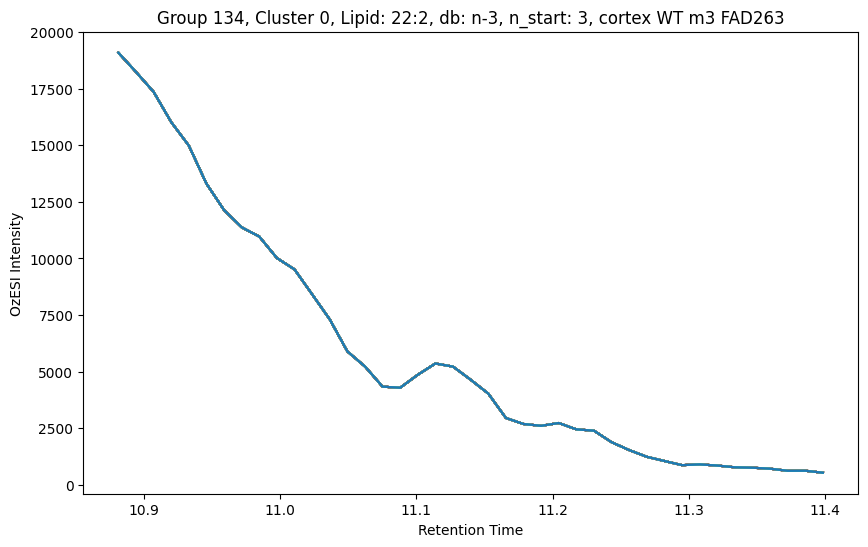

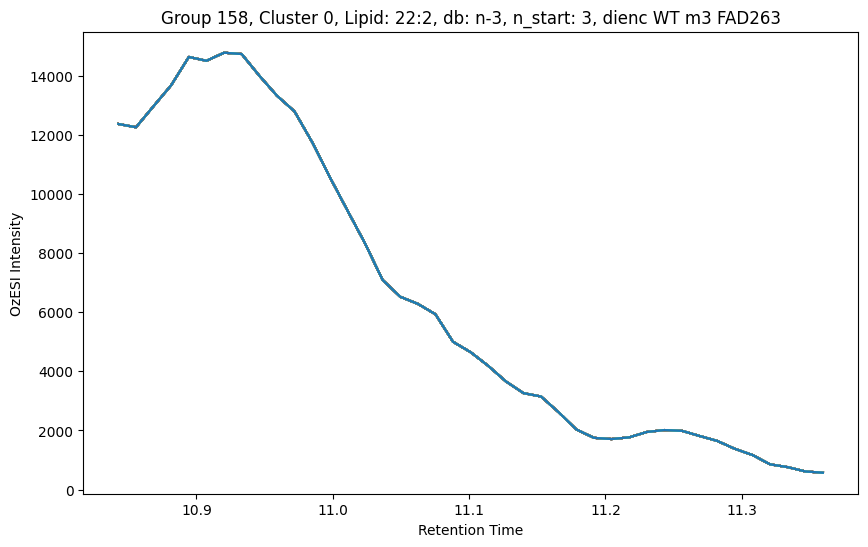

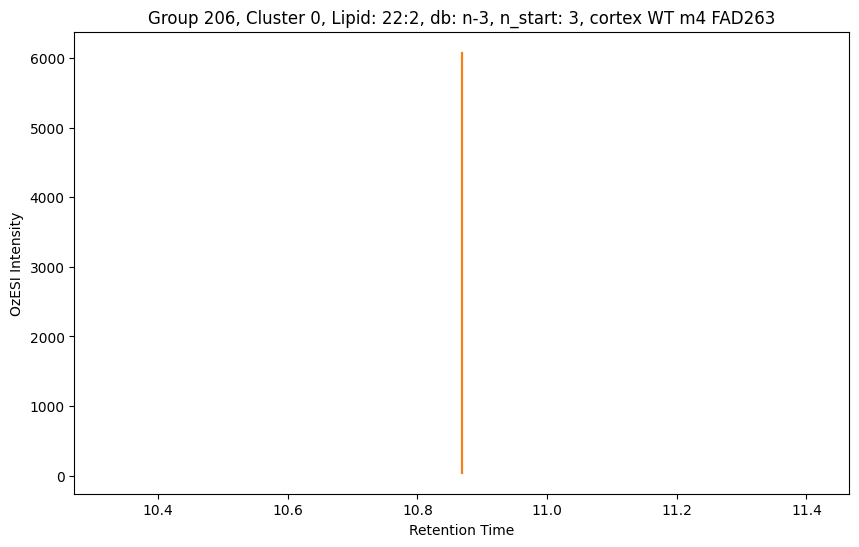

In [291]:
import matplotlib.pyplot as plt
import os

def plot_data(group_data, group, cluster_label, lipid_substring, save_dir):
    # Check if 'Lipid' column exists in group_data and filter if lipid_substring is provided
    if 'Lipid' in group_data.columns and lipid_substring:
        group_data = group_data[group_data['Lipid'].str.contains(lipid_substring, na=False)]

    # Proceed only if group_data is not empty
    if not group_data.empty:
        # Extracting data for plotting
        times = group_data['Retention_Time'].values
        intensities = group_data['OzESI_Intensity'].values

        # Plotting
        plt.figure(figsize=(10, 6))
        for _, row in group_data.iterrows():
            plt.plot(times, intensities, label=f"{row['Lipid']} Intensity")
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')

        # Extract additional information for the title
        lipid = group_data.iloc[0]['Lipid']
        db = group_data.iloc[0]['db']
        n_start = group_data.iloc[0]['n_start']  # Extract n_start value
        biology = group_data.iloc[0]['Biology']
        genotype = group_data.iloc[0]['Genotype']
        mouse = group_data.iloc[0]['Mouse']
        cage = group_data.iloc[0]['Cage']
        plt.title(f'Group {group}, Cluster {cluster_label}, Lipid: {lipid}, db: {db}, n_start: {n_start}, {biology} {genotype} {mouse} {cage}')

        # plt.legend()

        # Save the plot
        filename = f'Group_{group}_Cluster_{cluster_label}_Lipids_containing_{lipid_substring}_n_start_{n_start}.png'
        # Uncomment the line below to save the plot
        # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')
        plt.show()
        plt.close()

# Define the directory to save the plots
save_directory = 'Projects/FaceFats/plots/peak_check/manual/'  # Replace with your directory path

# Specify the substring to search in the Lipid column
selected_lipid_substring = '22:2'  # Replace with the substring you want to search for

# Plotting for each group-cluster pair in d10
for (group, cluster_label), group_df in d10a.groupby(['Group', 'Cluster_Label']):
    plot_data(group_df, group, cluster_label, selected_lipid_substring, save_directory)

#18:3, 

# Calculate Area of peak

In [292]:
d11 = d10.copy()  # Creating d11 DataFrame from the newly filtered d10



# Create an empty DataFrame for storing the calculated areas
area_results = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area'])

# Group by 'Group' and 'Cluster_Label'
grouped_data = d11.groupby(['Group', 'Cluster_Label'])

# Iterate over each group and calculate the area
for (group, cluster_label), group_data in grouped_data:
    # Sort the group data by 'Retention_Time'
    sorted_group_data = group_data.sort_values(by='Retention_Time')

    # Extract 'Retention_Time' and 'OzESI_Intensity'
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']

    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)

    # Append the results to the area_results DataFrame
    area_results = area_results.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Area': area
    }, ignore_index=True)

# Merge the calculated areas back into the original DataFrame
d11 = pd.merge(d11, area_results, on=['Group', 'Cluster_Label'])

# Round the 'Area' to 0 decimal places
d11['Area'] = d11['Area'].round(0)
d11


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,db,Group,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area
0,443.3,183.0,5.599133,171.980011,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0
1,443.3,183.0,5.612050,378.800018,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0
2,443.3,183.0,5.624967,642.120056,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0
3,443.3,183.0,5.637900,1118.100098,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0
4,443.3,183.0,5.650817,1672.820068,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,n-3,98,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,477.4,183.0,11.346633,751.020081,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0
6538,477.4,183.0,11.359550,708.180054,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0
6539,477.4,183.0,11.372467,615.500061,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0
6540,477.4,183.0,11.385383,617.500061,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,n-3,134,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0


# Data Dependent Threshold (List of intensities)

In [293]:
d12 = d11.copy()

# Group the data by 'Group' and collect the 'OzESI_Intensity' values in lists
grouped_data = d12.groupby('Group')['OzESI_Intensity'].apply(list).reset_index(name='Group_Intensity')
# Merge the original data with the grouped data
d12 = d12.merge(grouped_data, on='Group')


# Sorting the lists in the 'Group_Intensity' column
d12['Group_Intensity'] = d12['Group_Intensity'].apply(lambda x: sorted(x))

d12  # Display the first few rows of the merged DataFrame



def set_threshold(group_intensity_list, threshold1=0.3, threshold2=0):
    """
    Function to set a threshold at a specified level of the list and add an additional value to it.

    :param group_intensity_list: List of intensity values for a group.
    :param threshold1: The percentage level at which to set the threshold (default is 0.3 for 30%).
    :param threshold2: An additional value to add to the threshold (default is 0).
    :return: The threshold value.
    """
    if not group_intensity_list:
        return None
    sorted_list = sorted(group_intensity_list)
    index = int(len(sorted_list) * threshold1)
    return sorted_list[index] + threshold2

# Example usage
# Assuming df_merged is your DataFrame with the 'Group_Intensity' column
d12['Group_Threshold'] = d12['Group_Intensity'].apply(lambda x: set_threshold(x, threshold1=0.15, threshold2=100))
#round the threshold to 0 decimal places
d12['Group_Threshold'] = d12['Group_Threshold'].round(0)


# To display the first few rows of the DataFrame with the new column
d12

# Filter the DataFrame to keep only the rows where 'OzESI_Intensity' is greater than or equal to 'Group_Threshold'
d13 = d12[d12['OzESI_Intensity'] >= d12['Group_Threshold']]

# Display the first few rows of the filtered DataFrame
d13




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,Cluster_Label,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold
2,443.3,183.0,5.624967,642.120056,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0
3,443.3,183.0,5.637900,1118.100098,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0
4,443.3,183.0,5.650817,1672.820068,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0
5,443.3,183.0,5.663733,2012.120117,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0
6,443.3,183.0,5.676650,2002.900146,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,0,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,477.4,183.0,11.230350,2388.080078,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0
6529,477.4,183.0,11.243267,1879.000122,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0
6530,477.4,183.0,11.256183,1531.380127,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0
6531,477.4,183.0,11.269100,1234.120117,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,0,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0


# DDT Area Calculations 

In [294]:


# Assuming d5e is your original DataFrame
d14 = d13.copy()

# Create an empty DataFrame for storing the calculated areas
area_results_ddt = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area_DDT'])

# Group by 'Group' and 'Cluster_Label'
grouped_data_ddt = d14.groupby(['Group', 'Cluster_Label'])

# Iterate over each group and calculate the area
for (group, cluster_label), group_data in grouped_data_ddt:
    # Sort the group data by 'Retention_Time'
    sorted_group_data = group_data.sort_values(by='Retention_Time')

    # Extract 'Retention_Time' and 'OzESI_Intensity'
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']

    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)

    # Append the results to the area_results_ddt DataFrame
    area_results_ddt = area_results_ddt.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Area_DDT': area
    }, ignore_index=True)

# ... [previous code for calculating areas and appending to area_results_ddt] ...

# Merge the calculated areas back into the original DataFrame
d14 = pd.merge(d14, area_results_ddt, on=['Group', 'Cluster_Label'], how='left')

# Check if 'Area_DDT' is in d14 after merging
if 'Area_DDT' in d14.columns:
    # Round the 'Area_DDT' to 0 decimal places
    d14['Area_DDT'] = d14['Area_DDT'].round(0)
else:
    print("Area_DDT column not found in d14 after merging.")

# Display the DataFrame
d14






,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,...,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT
0,443.3,183.0,5.624967,642.120056,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0,684.0
1,443.3,183.0,5.637900,1118.100098,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0,684.0
2,443.3,183.0,5.650817,1672.820068,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0,684.0
3,443.3,183.0,5.663733,2012.120117,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0,684.0
4,443.3,183.0,5.676650,2002.900146,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,443.3 -> 183.0,1469,20:5,hippo,5xFAD,...,98,2084.0,5.689583,0.190417,5.59,6.40,712.0,"[112.24000549316406, 123.00000762939453, 133.0...",389.0,684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,477.4,183.0,11.230350,2388.080078,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0,2894.0
3903,477.4,183.0,11.243267,1879.000122,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0,2894.0
3904,477.4,183.0,11.256183,1531.380127,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0,2894.0
3905,477.4,183.0,11.269100,1234.120117,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,477.4 -> 183.0,1858,22:2,cortex,WT,...,134,19488.0,10.868567,0.271433,10.87,11.41,2983.0,"[530.1600341796875, 615.5000610351562, 617.500...",947.0,2894.0


# Remove db not present and sort df 

In [295]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first

d15 = d14.copy()
# Assuming your DataFrame is named d15
d15 = d15[d15['db'] != '']
d15




#sort d15 by max OzESI_Intensity
d15 = d15.sort_values(by='OzESI_Intensity', ascending=False)

d15 = d15.groupby(['Lipid', 'Sample_ID', 'db']).first().reset_index()



#round the retention time to 2 decimal places
d15['Retention_Time'] = d15['Retention_Time'].round(2)
#round intensity to 0 decimal places
d15['OzESI_Intensity'] = d15['OzESI_Intensity'].round(0)

d15 = d15.sort_values(by=['Biology','Genotype'])

d15

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT
23,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,5535.0,421.4 -> 183.0,1202,cereb,...,1,5535.0,7.241250,0.268750,7.24,7.78,765.0,"[114.06000518798828, 170.16001892089844, 197.0...",356.0,749.0
24,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,379.3 -> 183.0,782,cereb,...,5,11932.0,7.514633,0.004633,7.42,7.77,1287.0,"[41.80000305175781, 163.6400146484375, 611.680...",853.0,1271.0
31,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,4077.0,421.4 -> 183.0,1210,cereb,...,57,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0
32,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,379.3 -> 183.0,790,cereb,...,62,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0
33,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.25,4084.0,421.4 -> 183.0,1211,cereb,...,57,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20:5,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,2016.0,443.3 -> 183.0,1453,hippo,...,293,2016.0,6.154700,0.274700,5.64,6.17,607.0,"[635.820068359375, 709.9400634765625, 714.1800...",903.0,618.0
124,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,339.3 -> 183.0,474,hippo,...,174,3728.0,7.593583,1.523583,7.32,7.86,484.0,"[54.54000473022461, 89.58000946044922, 129.960...",274.0,520.0
132,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,339.3 -> 183.0,479,hippo,...,238,2479.0,7.580667,1.510667,7.35,7.89,605.0,"[101.46000671386719, 152.24000549316406, 162.4...",319.0,644.0
140,22:6,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,469.4,183.0,6.11,43156.0,469.4 -> 183.0,1705,hippo,...,294,43156.0,6.114700,0.044700,6.11,6.39,2365.0,"[391.5600280761719, 481.5000305175781, 570.920...",672.0,2303.0


Calculate Area Ratio

In [296]:
d16 = d15.copy()

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d16[d16['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# DataFrame for Area Ratios
area_ratios = pd.DataFrame(columns=['Lipid', 'Sample_ID', 'Area_DDT_Ratio'])

# Calculate Area Ratio for each group
for (lipid, sample_id), group in grouped:
    n9_area = group[group['db'] == 'n-9']['Area_DDT'].sum()  # Sum if there are multiple 'n-9' entries
    n7_area = group[group['db'] == 'n-7']['Area_DDT'].sum()  # Sum if there are multiple 'n-7' entries
    ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

    # Append to DataFrame
    area_ratios = area_ratios.append({
        'Lipid': lipid,
        'Sample_ID': sample_id,
        'Area_DDT_Ratio': ratio
    }, ignore_index=True)

# Merge the Area Ratio DataFrame with the original DataFrame
d16 = pd.merge(d16, area_ratios, on=['Lipid', 'Sample_ID'], how='left')

d16 # Display the updated DataFrame with 'Area_Ratio'


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT,Area_DDT_Ratio
0,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,5535.0,421.4 -> 183.0,1202,cereb,...,5535.0,7.241250,0.268750,7.24,7.78,765.0,"[114.06000518798828, 170.16001892089844, 197.0...",356.0,749.0,None
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,379.3 -> 183.0,782,cereb,...,11932.0,7.514633,0.004633,7.42,7.77,1287.0,"[41.80000305175781, 163.6400146484375, 611.680...",853.0,1271.0,None
2,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,4077.0,421.4 -> 183.0,1210,cereb,...,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,379.3 -> 183.0,790,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
4,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.25,4084.0,421.4 -> 183.0,1211,cereb,...,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20:5,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,2016.0,443.3 -> 183.0,1453,hippo,...,2016.0,6.154700,0.274700,5.64,6.17,607.0,"[635.820068359375, 709.9400634765625, 714.1800...",903.0,618.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,339.3 -> 183.0,474,hippo,...,3728.0,7.593583,1.523583,7.32,7.86,484.0,"[54.54000473022461, 89.58000946044922, 129.960...",274.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,339.3 -> 183.0,479,hippo,...,2479.0,7.580667,1.510667,7.35,7.89,605.0,"[101.46000671386719, 152.24000549316406, 162.4...",319.0,644.0,None
165,22:6,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,469.4,183.0,6.11,43156.0,469.4 -> 183.0,1705,hippo,...,43156.0,6.114700,0.044700,6.11,6.39,2365.0,"[391.5600280761719, 481.5000305175781, 570.920...",672.0,2303.0,None


# Save df to results

In [297]:
# d16_save_directory = 'Projects/FaceFats/results/'
# d16.to_csv(os.path.join(d16_save_directory, 'LiverOzON_01Jan24.csv'), index=False)
d16

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT,Area_DDT_Ratio
0,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,5535.0,421.4 -> 183.0,1202,cereb,...,5535.0,7.241250,0.268750,7.24,7.78,765.0,"[114.06000518798828, 170.16001892089844, 197.0...",356.0,749.0,None
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,379.3 -> 183.0,782,cereb,...,11932.0,7.514633,0.004633,7.42,7.77,1287.0,"[41.80000305175781, 163.6400146484375, 611.680...",853.0,1271.0,None
2,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.24,4077.0,421.4 -> 183.0,1210,cereb,...,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,379.3 -> 183.0,790,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
4,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,421.4,183.0,7.25,4084.0,421.4 -> 183.0,1211,cereb,...,4678.0,7.228317,0.281683,7.23,7.78,649.0,"[96.84000396728516, 119.56000518798828, 122.90...",317.0,668.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20:5,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,2016.0,443.3 -> 183.0,1453,hippo,...,2016.0,6.154700,0.274700,5.64,6.17,607.0,"[635.820068359375, 709.9400634765625, 714.1800...",903.0,618.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,339.3 -> 183.0,474,hippo,...,3728.0,7.593583,1.523583,7.32,7.86,484.0,"[54.54000473022461, 89.58000946044922, 129.960...",274.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,339.3 -> 183.0,479,hippo,...,2479.0,7.580667,1.510667,7.35,7.89,605.0,"[101.46000671386719, 152.24000549316406, 162.4...",319.0,644.0,None
165,22:6,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,469.4,183.0,6.11,43156.0,469.4 -> 183.0,1705,hippo,...,43156.0,6.114700,0.044700,6.11,6.39,2365.0,"[391.5600280761719, 481.5000305175781, 570.920...",672.0,2303.0,None


# RT Window Drop peaks

In [298]:


# # Assuming d6 and df_db_pos are your DataFrames and user_window is the time window specified by the user
# user_window = 0.5  # Replace 0.5 with the value specified by the user

# # Copy d6 to d17
# d17 = d16.copy()

# # Iterate over each row in d17
# for index, row in d17.iterrows():
#     # Extract Lipid and Retention_Time from the row in d17
#     lipid = row['Lipid']
#     retention_time_d7 = row['Retention_Time']

#     # Find the corresponding row in df_db_pos
#     df_db_pos_row = df_db_pos[df_db_pos['Lipid'] == lipid]

#     # Check if the lipid was found in df_db_pos
#     if not df_db_pos_row.empty:
#         # Extract the Average_Retention_Time from df_db_pos
#         retention_time_db_pos = df_db_pos_row.iloc[0]['Retention_Time']

#         # Check if the retention time in d17 is outside the specified window
#         if abs(retention_time_d7 - retention_time_db_pos) > user_window:
#             # Remove the row from d17 if it is outside the window
#             d17.drop(index, inplace=True)

# # #show all TG(52:5)
# # d17[d17['Lipid'].str.contains('TG\(54:3\)')].head(60)


# d17



d17 = d16.copy()
def filter_d17_by_criteria(d17, df_db_pos, user_window):
    # Copy d17 to avoid modifying the original DataFrame
    filtered_d17 = d17.copy()

    # Iterate over each row in filtered_d17
    for index, row in filtered_d17.iterrows():
        # Extract Lipid, Biology, Genotype, Cage, Mouse, and Cluster_RT from the row
        lipid = row['Lipid']
        biology = row['Biology']
        genotype = row['Genotype']
        cage = row['Cage']
        mouse = row['Mouse']
        cluster_rt_d17 = row['Cluster_RT']  # Assuming 'Cluster_RT' is the column name

        # Find the corresponding row in df_db_pos
        df_db_pos_row = df_db_pos[
            (df_db_pos['Lipid'] == lipid) &
            (df_db_pos['Biology'] == biology) &
            (df_db_pos['Genotype'] == genotype) &
            (df_db_pos['Cage'] == cage) &
            (df_db_pos['Mouse'] == mouse)
        ]

        # Check if a matching row was found in df_db_pos
        if not df_db_pos_row.empty:
            # Extract the Retention_Time from df_db_pos
            retention_time_db_pos = df_db_pos_row.iloc[0]['Retention_Time']

            # Check if the Cluster_RT in d17 is outside the specified window of Retention_Time in df_db_pos
            if abs(cluster_rt_d17 - retention_time_db_pos) > user_window:
                # Remove the row from filtered_d17 if it is outside the window
                filtered_d17.drop(index, inplace=True)

    return filtered_d17

# Example usage:
user_window = .20  # Example window value
d17 = filter_d17_by_criteria(d17, df_db_pos, user_window)

d17
# # Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
# filtered_rows = d17[(d17['Lipid'].str.contains('TG\(54:2\)')) ]

# filtered_rows

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT,Area_DDT_Ratio
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,379.3 -> 183.0,782,cereb,...,11932.0,7.514633,0.004633,7.42,7.77,1287.0,"[41.80000305175781, 163.6400146484375, 611.680...",853.0,1271.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,379.3 -> 183.0,790,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,379.3 -> 183.0,791,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,419.3 -> 183.0,1168,cereb,...,639.0,6.543750,0.016250,6.27,6.83,82.0,"[41.58000183105469, 41.58000183105469, 41.5800...",142.0,132.0,None
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,419.3 -> 183.0,1169,cereb,...,639.0,6.543750,0.016250,6.27,6.83,82.0,"[41.58000183105469, 41.58000183105469, 41.5800...",142.0,132.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,379.3 -> 183.0,781,hippo,...,8120.0,7.514617,0.004617,7.42,7.77,801.0,"[41.44000244140625, 94.46000671386719, 258.840...",713.0,796.0,None
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,443.3 -> 183.0,1445,hippo,...,1417.0,6.154717,0.274717,5.88,6.41,316.0,"[59.96000289916992, 71.82000732421875, 74.9000...",191.0,307.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,339.3 -> 183.0,474,hippo,...,3728.0,7.593583,1.523583,7.32,7.86,484.0,"[54.54000473022461, 89.58000946044922, 129.960...",274.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,339.3 -> 183.0,479,hippo,...,2479.0,7.580667,1.510667,7.35,7.89,605.0,"[101.46000671386719, 152.24000549316406, 162.4...",319.0,644.0,None


In [299]:
# print group 1 from d17
d17[d17['Group'] == 1]

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT,Area_DDT_Ratio


# Plot stacked bar plot 

In [300]:
d17

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Match_Group,Biology,...,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,RT_Start,RT_End,Area,Group_Intensity,Group_Threshold,Area_DDT,Area_DDT_Ratio
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,379.3 -> 183.0,782,cereb,...,11932.0,7.514633,0.004633,7.42,7.77,1287.0,"[41.80000305175781, 163.6400146484375, 611.680...",853.0,1271.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,379.3 -> 183.0,790,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,379.3 -> 183.0,791,cereb,...,12889.0,7.514617,0.004617,7.44,7.77,1198.0,"[603.8800659179688, 657.1200561523438, 696.660...",1028.0,1215.0,None
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,419.3 -> 183.0,1168,cereb,...,639.0,6.543750,0.016250,6.27,6.83,82.0,"[41.58000183105469, 41.58000183105469, 41.5800...",142.0,132.0,None
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,419.3 -> 183.0,1169,cereb,...,639.0,6.543750,0.016250,6.27,6.83,82.0,"[41.58000183105469, 41.58000183105469, 41.5800...",142.0,132.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,379.3 -> 183.0,781,hippo,...,8120.0,7.514617,0.004617,7.42,7.77,801.0,"[41.44000244140625, 94.46000671386719, 258.840...",713.0,796.0,None
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,443.3 -> 183.0,1445,hippo,...,1417.0,6.154717,0.274717,5.88,6.41,316.0,"[59.96000289916992, 71.82000732421875, 74.9000...",191.0,307.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,339.3 -> 183.0,474,hippo,...,3728.0,7.593583,1.523583,7.32,7.86,484.0,"[54.54000473022461, 89.58000946044922, 129.960...",274.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,339.3 -> 183.0,479,hippo,...,2479.0,7.580667,1.510667,7.35,7.89,605.0,"[101.46000671386719, 152.24000549316406, 162.4...",319.0,644.0,None


In [301]:
# Step 1: Create d18 as a copy of d24
d18 = d17.copy()

# Step 2: Define the columns to be dropped
dropped_columns = ['Transition', 'Group_Threshold', 'Group_Intensity', 'Cluster_Label', 'RT_Start','RT_End']

# Step 3: Drop the specified columns from d18
d18.drop(columns=dropped_columns, inplace=True)

# d18 now has the specified columns dropped
d18

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Biology,Genotype,...,Mouse,n_start,Group,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,Area,Area_DDT,Area_DDT_Ratio
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,782,cereb,5xFAD,...,m1,3,5,5,11932.0,7.514633,0.004633,1287.0,1271.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,790,cereb,5xFAD,...,m2,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,791,cereb,5xFAD,...,m2,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,1168,cereb,5xFAD,...,m2,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,1169,cereb,5xFAD,...,m2,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,781,hippo,WT,...,m5,3,295,295,8120.0,7.514617,0.004617,801.0,796.0,None
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,1445,hippo,WT,...,m4,3,241,241,1417.0,6.154717,0.274717,316.0,307.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,474,hippo,WT,...,m3,9,174,174,3728.0,7.593583,1.523583,484.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,479,hippo,WT,...,m4,9,238,238,2479.0,7.580667,1.510667,605.0,644.0,None


# make mouse column

In [302]:
# Extracting the mouse name from the 'Sample_ID' column
d18['Mouse'] = d18['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
d18

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Biology,Genotype,...,Mouse,n_start,Group,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,Area,Area_DDT,Area_DDT_Ratio
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,782,cereb,5xFAD,...,5xFAD-m1-cereb-FAD231_AMP,3,5,5,11932.0,7.514633,0.004633,1287.0,1271.0,None
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,790,cereb,5xFAD,...,5xFAD-m2-cereb-FAD231_AMP,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,791,cereb,5xFAD,...,5xFAD-m2-cereb-FAD257_AMP,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,1168,cereb,5xFAD,...,5xFAD-m2-cereb-FAD231_AMP,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,1169,cereb,5xFAD,...,5xFAD-m2-cereb-FAD257_AMP,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,781,hippo,WT,...,WT-m5-hippo-FAD263_AMP,3,295,295,8120.0,7.514617,0.004617,801.0,796.0,None
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,1445,hippo,WT,...,WT-m4-hippo-FAD263_AMP,3,241,241,1417.0,6.154717,0.274717,316.0,307.0,None
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,474,hippo,WT,...,WT-m3-hippo-FAD263_AMP,9,174,174,3728.0,7.593583,1.523583,484.0,520.0,None
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,479,hippo,WT,...,WT-m4-hippo-FAD263_AMP,9,238,238,2479.0,7.580667,1.510667,605.0,644.0,None


# Group by Sample Lipid Biology Genotype and sort by FA16:1 FA18:1

In [303]:
d18['SLBG_group'] = d18.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# d18 = d18.sort_values(by=['FAC', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
# d18['FAC'] = pd.Categorical(d18['FAC'], categories=['FA16:1', 'FA18:1'], ordered=True)
# d18 = d18.sort_values(by=['FAC', 'Lipid'])
d18

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Biology,Genotype,...,n_start,Group,group_n,Max_Intensity,Cluster_RT,Cluster_Ground_Truth_Dif,Area,Area_DDT,Area_DDT_Ratio,SLBG_group
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,782,cereb,5xFAD,...,3,5,5,11932.0,7.514633,0.004633,1287.0,1271.0,None,11
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,790,cereb,5xFAD,...,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None,15
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,791,cereb,5xFAD,...,3,62,62,12889.0,7.514617,0.004617,1198.0,1215.0,None,16
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,1168,cereb,5xFAD,...,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None,32
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,1169,cereb,5xFAD,...,3,58,58,639.0,6.543750,0.016250,82.0,132.0,None,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,781,hippo,WT,...,3,295,295,8120.0,7.514617,0.004617,801.0,796.0,None,10
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,1445,hippo,WT,...,3,241,241,1417.0,6.154717,0.274717,316.0,307.0,None,59
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,474,hippo,WT,...,9,174,174,3728.0,7.593583,1.523583,484.0,520.0,None,77
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,479,hippo,WT,...,9,238,238,2479.0,7.580667,1.510667,605.0,644.0,None,81


# Clean up dataframe

In [304]:
d18a = d18.copy()

def drop_selected_columns(df, columns_to_drop):
    """
    Drops the specified columns from the DataFrame.

    Parameters:
    df (DataFrame): The original DataFrame.
    columns_to_drop (list): List of column names to be dropped.

    Returns:
    DataFrame: A new DataFrame with the specified columns dropped.
    """
    return df.drop(columns=columns_to_drop, errors='ignore')

# Example usage
# Assuming your DataFrame is named df
columns_to_drop = ['SLBG_group', 'Cluster_Ground_Truth_Dif', 'Area_DDT_Ratio', 'Cluster_RT', 'Match_Group']
d18a = drop_selected_columns(d18a, columns_to_drop)
d18a


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,Cage,Mouse,n_start,Group,group_n,Max_Intensity,Area,Area_DDT
1,18:2,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,11932.0,cereb,5xFAD,FAD231,5xFAD-m1-cereb-FAD231_AMP,3,5,5,11932.0,1287.0,1271.0
3,18:2,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.51,12889.0,cereb,5xFAD,FAD231,5xFAD-m2-cereb-FAD231_AMP,3,62,62,12889.0,1198.0,1215.0
5,18:2,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-6,379.3,183.0,7.49,8681.0,cereb,5xFAD,FAD257,5xFAD-m2-cereb-FAD257_AMP,3,62,62,12889.0,1198.0,1215.0
6,18:3,11192023_5xFAD-m2-cereb-FAD231_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,431.0,cereb,5xFAD,FAD231,5xFAD-m2-cereb-FAD231_AMP,3,58,58,639.0,82.0,132.0
7,18:3,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,n-3,419.3,183.0,6.54,639.0,cereb,5xFAD,FAD257,5xFAD-m2-cereb-FAD257_AMP,3,58,58,639.0,82.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18:2,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.51,8120.0,hippo,WT,FAD263,WT-m5-hippo-FAD263_AMP,3,295,295,8120.0,801.0,796.0
161,20:5,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-3,443.3,183.0,6.15,1417.0,hippo,WT,FAD263,WT-m4-hippo-FAD263_AMP,3,241,241,1417.0,316.0,307.0
163,22:6,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.59,3728.0,hippo,WT,FAD263,WT-m3-hippo-FAD263_AMP,9,174,174,3728.0,484.0,520.0
164,22:6,11162023_WT-m4-hippo-FAD263_AMP_2x_0.05uMd216-...,n-12,339.3,183.0,7.58,2479.0,hippo,WT,FAD263,WT-m4-hippo-FAD263_AMP,9,238,238,2479.0,605.0,644.0


In [305]:
#sorta d18a by lipid and sample_ID
d18b = d18a.copy()
#drop OzESI values under 1000
d18b = d18b[d18b['OzESI_Intensity'] > 1000]
d18b = d18b.sort_values(by=['Lipid', 'Sample_ID'])
d18b

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Biology,Genotype,Cage,Mouse,n_start,Group,group_n,Max_Intensity,Area,Area_DDT
20,18:2,11162023_WT-m3-cereb-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.57,5545.0,cereb,WT,FAD263,WT-m3-cereb-FAD263_AMP,3,116,116,5545.0,665.0,667.0
63,18:2,11162023_WT-m3-cortex-FAD263_AMP_2x_0.05uMd216...,n-6,379.3,183.0,7.49,10943.0,cortex,WT,FAD263,WT-m3-cortex-FAD263_AMP,3,136,136,10943.0,1274.0,1264.0
113,18:2,11162023_WT-m3-dienc-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.53,8175.0,dienc,WT,FAD263,WT-m3-dienc-FAD263_AMP,3,160,160,8175.0,920.0,918.0
156,18:2,11162023_WT-m3-hippo-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.59,5576.0,hippo,WT,FAD263,WT-m3-hippo-FAD263_AMP,3,178,178,5576.0,587.0,592.0
22,18:2,11162023_WT-m4-cereb-FAD263_AMP_2x_0.05uMd216-...,n-6,379.3,183.0,7.59,8079.0,cereb,WT,FAD263,WT-m4-cereb-FAD263_AMP,3,190,190,8079.0,813.0,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,22:6,11192023_5xFAD-m2-cortex-FAD257_AMP_2x_0.05uMd...,n-12,339.3,183.0,7.50,6519.0,cortex,5xFAD,FAD257,5xFAD-m2-cortex-FAD257_AMP,9,69,69,6519.0,742.0,739.0
108,22:6,11192023_5xFAD-m2-dienc-FAD231_AMP_2x_0.05uMd2...,n-3,469.4,183.0,5.88,71182.0,dienc,5xFAD,FAD231,5xFAD-m2-dienc-FAD231_AMP,3,86,86,71182.0,9364.0,9386.0
110,22:6,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,n-3,469.4,183.0,5.87,68035.0,dienc,5xFAD,FAD257,5xFAD-m2-dienc-FAD257_AMP,3,86,86,71182.0,9364.0,9386.0
153,22:6,11192023_5xFAD-m2-hippo-FAD231_AMP_2x_0.05uMd2...,n-3,469.4,183.0,6.13,8895.0,hippo,5xFAD,FAD231,5xFAD-m2-hippo-FAD231_AMP,3,99,99,8895.0,1880.0,1693.0


# Save results

In [306]:
# save_results_directory = 'Projects/FaceFats/results/'
# save_results_name = 'Brain5xFAD_OzON_Truth_Results_14Jan2024'
# file_extension = '.csv'
# file_number = 1
# full_path = os.path.join(save_results_directory, f'{save_results_name}{file_extension}')


# # Check if file exists and increment the number suffix until an unused filename is found
# while os.path.exists(full_path):
#     full_path = os.path.join(save_results_directory, f'{save_results_name}_{file_number}{file_extension}')
#     file_number += 1

# # Save the dataframe to the new path
# d18.to_csv(full_path, index=False)



# d18.to_excel('Projects/FaceFats/results/Brain5xFAD_OzON_Truth_Results_14Jan2024.xlsx', index=False)
# d18.to_csv('Projects/FaceFats/results/Brain5xFAD_OzON_Truth_Results_14Jan2024.csv', index=False)

# Load Results

In [307]:
# # Example usage:
# d_load = pd.read_csv('Projects/FaceFats/results/Brain5xFAD_OzON_Results_04Jan2024_7.csv')

# Create DB columns for pviot table n7 n9 n10 n12 focus on Brain 5xFAD only

In [308]:
# # use d_load or dload

# # # Filtering for 5xFAD Genotype
# df_5xFAD = d18[d18['Genotype'] == '5xFAD']
# # df_5xFAD = d_load[d_load['Genotype'] == '5xFAD']

# # Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
# df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']

# # Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
# df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']
# df_brain_5xFAD_cereb = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cereb']
# df_brain_5xFAD_cortex = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cortex']
# df_brain_5xFAD_hippo = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'hippo']
# df_brain_5xFAD_dienc = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'dienc']

# def process_n_percent(df):
#     # Create and fill n-7, n-9, n-10, n-12 columns
#     for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#         df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

#     # Group by 'Lipid' and sum up the n columns
#     df_grouped = df.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

#     # Calculate total intensity
#     df_grouped['Total_Intensity'] = df_grouped[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

#     # Calculate relative intensities
#     for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#         df_grouped[col + '%'] = ((df_grouped[col] / df_grouped['Total_Intensity']) * 100).round(1)

#     # Return the new dataframe
#     return df_grouped

# #Example usage:
# df_brain_5xFAD2 = process_n_percent(df_brain_5xFAD)
# df_brain_5xFAD_cereb2 = process_n_percent(df_brain_5xFAD_cereb)
# df_brain_5xFAD_cortex2 = process_n_percent(df_brain_5xFAD_cortex)
# df_brain_5xFAD_hippo2 = process_n_percent(df_brain_5xFAD_hippo)
# df_brain_5xFAD_dienc2 = process_n_percent(df_brain_5xFAD_dienc)



# # Display the final DataFrame df_brain_5xFAD2
# df_brain_5xFAD2
# df_brain_5xFAD_cereb2
# df_brain_5xFAD_cortex2
# df_brain_5xFAD_hippo2
# df_brain_5xFAD_dienc2


# create total intensity and column for FA 16 18

In [309]:
# # Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
# df_brain_5xFAD2 = df_brain_5xFAD.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
# #Creating a new column 'Total Intensity' in df_brain_5xFAD2
# df_brain_5xFAD2['Total_Intensity'] = df_brain_5xFAD2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# # Create the 'FA' column
# df_brain_5xFAD2['FA'] = df_brain_5xFAD2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# # Sort the DataFrame by the 'FA' column
# df_brain_5xFAD2.sort_values(by='FA', inplace=True)
# # Displaying df4
# df_brain_5xFAD2

# add n% FAC and TG columns 

In [310]:
# # Creating a new dataframe df_brain_5xFAD3 from df_liver2
# df_brain_5xFAD3 = df_brain_5xFAD2.copy()

# # Calculating the relative intensity of each db_pos for each lipid
# for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#     df_brain_5xFAD3[col + '%'] = ((df_brain_5xFAD3[col] / df_brain_5xFAD3['Total_Intensity']) * 100).round(1)


# # Function to determine the value for the FAC column
# def determine_fac(lipid):
#     if 'FA18:1' in lipid:
#         return 'FA18:1'
#     elif 'FA16:1' in lipid:
#         return 'FA16:1'
#     else:
#         return None  # or some other default value

# # Apply the function to the Lipid column to create the FAC column
# df_brain_5xFAD3['FAC'] = df_brain_5xFAD3['Lipid'].apply(determine_fac)

# import pandas as pd
# import re

# # Function to extract TG values
# def extract_tg(lipid):
#     # Regular expression pattern to match TG(##:#) or similar patterns
#     pattern = r'TG\(\d+:\d+\)'
#     matches = re.findall(pattern, lipid)
#     return ', '.join(matches) if matches else None

# # Apply the function to the Lipid column to create the TG column
# df_brain_5xFAD3['TG'] = df_brain_5xFAD3['Lipid'].apply(extract_tg)




# # Function to sort TG values within a cell
# def sort_tg_values(tg_cell):
#     if not pd.isna(tg_cell) and ', ' in tg_cell:
#         tg_list = tg_cell.split(', ')
#         tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
#         return ', '.join(tg_list_sorted)
#     else:
#         return tg_cell

# # Apply the function to the TG column
# df_brain_5xFAD3['TG'] = df_brain_5xFAD3['TG'].apply(sort_tg_values)
# df_brain_5xFAD3 = df_brain_5xFAD3.sort_values(by=['FAC', 'TG'])
# import pandas as pd
# import re

# # Function to remove TG(##:0) patterns from the Lipid string
# def remove_tg_zero(lipid):
#     # Pattern to match TG(##:0)
#     pattern = r'TG\(\d+:0\)'
#     # Remove TG(##:0) patterns
#     new_lipid = re.sub(pattern, '', lipid)
#     # Remove any extra commas and spaces left after removal
#     new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
#     return new_lipid

# # Apply the function to the Lipid column
# df_brain_5xFAD3['Lipid'] = df_brain_5xFAD3['Lipid'].apply(remove_tg_zero)

# # Continue with the rest of your code for sorting
# # ... [rest of your code] ...

# # Displaying df_l


# # Displaying df_brain_5xFAD3 with the new relative intensity columns
# df_brain_5xFAD3


# Create pivot table from data above

In [311]:
# # Reshaping the DataFrame
# reshaped_df = df_brain_5xFAD3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


# # reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

# reshaped_df


# # Creating a pivot table
# pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')


# # Function to generate a combined sorting key
# def combined_sort_key(lipid):
#     # Check if lipid contains 'FA16:1'
#     fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

#     # Extract and sort TG values
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

#     # Combine the keys
#     return fa16_1_key + tg_list_sorted + lipid

# # Apply the combined sorting function to the Lipid index to create a sorting key
# pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)


# # Sort the DataFrame by the combined sorting key
# pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# # Drop the combined sorting key column
# pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# # Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%']
# # column_order = ['n-9%', 'n-7%', 'n-10%']
# pivot_df = pivot_df[column_order]
# #delete FA18:2

# pivot_df
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 8))
# pivot_df.plot(kind='barh', stacked=True, ax=ax)

# ax.set_xlabel('Relative Intensity (%)', fontsize = 16)
# ax.set_ylabel('Lipid', fontsize = 16)
# ax.set_title('Brain 5xFAD Lipid Area DB%', fontsize = 20)
# plt.xticks(fontsize =14)
# plt.yticks(fontsize =14)

# # Moving the legend outside of the plot
# ax.legend(title='DB Position %', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 16, title_fontsize = 16)

# # # # Saving the plot as a PNG file
# # plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_Brain5xFAD_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
# # plt.savefig('Projects/FaceFats/plots/Barstack_area/FF_Brain5xFAD_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')
# # # #save as pdf

# plt.tight_layout()
# plt.show()


# Brain region stacked barplot

In [312]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import re

# def combined_sort_key(lipid):
#     fa16_1_key = '0' if 'FA16:1' in lipid else '1'
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
#     return fa16_1_key + tg_list_sorted + lipid

# def plot_brain_region_5xFAD(df, region_name):
#     # # Calculate percentages
#     # for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#     #     df[col + '%'] = ((df[col] / df['Total Intensity']) * 100).round(1)

#     # Reshape the DataFrame
#     reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

#     # Create pivot table
#     pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%']]

#     # Apply the combined sorting function to the Lipid index to create a sorting key
#     pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

#     # Sort the DataFrame by the combined sorting key
#     pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

#     # Drop the combined sorting key column
#     pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

#     # Plotting
#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
#     plt.xlabel('Relative Intensity (%)', fontsize = 16)
#     plt.ylabel('Lipid', fontsize = 16)
#     plt.title(f'{region_name} 5xFAD Lipid Area DB%', fontsize = 20)
#     plt.legend(title='DB Position %', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16, title_fontsize = 16)
#     plt.xticks(fontsize =14)
#     plt.yticks(fontsize =14)

#     # Saving the plot
#     # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_5xFAD_Area_Truth_14Jan24.png', dpi=300, bbox_inches='tight')
#     # plt.savefig(f'Projects/FaceFats/plots/Barstack_area/{region_name}_5xFAD_Area_Truth_14Jan24.pdf', dpi=300, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show()


# df_brain_5xFAD_cereb2
# df_brain_5xFAD_cortex2
# df_brain_5xFAD_hippo2
# df_brain_5xFAD_dienc2
# # Example usage
# plot_brain_region_5xFAD(df_brain_5xFAD_cereb2, 'Cerebellum')
# plot_brain_region_5xFAD(df_brain_5xFAD_hippo2, 'Hippocampus')
# plot_brain_region_5xFAD(df_brain_5xFAD_cortex2, 'Cortex')
# plot_brain_region_5xFAD(df_brain_5xFAD_dienc2, 'Diencephalon')


In [313]:
# # Assuming d17 is your DataFrame
# # Filter d17 for rows where 'Lipid' column contains 'TG(52:5)'
# filtered_d16 = d17[d17['Lipid'].str.contains('TG\(54:4\)')]

# # The filtered_d16 DataFrame now contains only rows where 'Lipid' includes 'TG(52:5)'
# filtered_d16

# Create db columns for pivot table. n7 n9 n10 n12. Focus on Liver samples only

In [314]:
# df_liver = d18[d18['Biology'] == 'liver']

# # Creating the columns n-7, n-9, n-10, and n-12 in df_liver
# df_liver['n-7'] = 0.0
# df_liver['n-9'] = 0.0
# df_liver['n-10'] = 0.0
# df_liver['n-12'] = 0.0

# # Filling the columns based on db_pos and corresponding OzESI intensity
# for index, row in df_liver.iterrows():
#     db_pos = row['db']
#     oz_intensity = row['Area_DDT']
#     if db_pos in ['n-7', 'n-9', 'n-10', 'n-12']:
#         df_liver.at[index, db_pos] = oz_intensity
# df_liver

# #print unqiue lipids
# df_liver['Lipid'].unique()

In [315]:
# # Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
# df_liver2 = df_liver.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
# #Creating a new column 'Total Intensity' in df_liver2
# df_liver2['Total_Intensity'] = df_liver2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# # Create the 'FA' column
# df_liver2['FA'] = df_liver2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# # Sort the DataFrame by the 'FA' column
# df_liver2.sort_values(by='FA', inplace=True)
# # Displaying df4
# df_liver2

In [316]:
# # Creating a new dataframe df_liver3 from df_liver2
# df_liver3 = df_liver2.copy()

# # Calculating the relative intensity of each db_pos for each lipid
# for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#     df_liver3[col + '%'] = ((df_liver3[col] / df_liver3['Total_Intensity']) * 100).round(1)


# # Function to determine the value for the FAC column
# def determine_fac(lipid):
#     if 'FA18:1' in lipid:
#         return 'FA18:1'
#     elif 'FA16:1' in lipid:
#         return 'FA16:1'
#     else:
#         return None  # or some other default value

# # Apply the function to the Lipid column to create the FAC column
# df_liver3['FAC'] = df_liver3['Lipid'].apply(determine_fac)

# import pandas as pd
# import re

# # Function to extract TG values
# def extract_tg(lipid):
#     # Regular expression pattern to match TG(##:#) or similar patterns
#     pattern = r'TG\(\d+:\d+\)'
#     matches = re.findall(pattern, lipid)
#     return ', '.join(matches) if matches else None

# # Apply the function to the Lipid column to create the TG column
# df_liver3['TG'] = df_liver3['Lipid'].apply(extract_tg)




# # Function to sort TG values within a cell
# def sort_tg_values(tg_cell):
#     if not pd.isna(tg_cell) and ', ' in tg_cell:
#         tg_list = tg_cell.split(', ')
#         tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
#         return ', '.join(tg_list_sorted)
#     else:
#         return tg_cell

# # Apply the function to the TG column
# df_liver3['TG'] = df_liver3['TG'].apply(sort_tg_values)
# df_liver3 = df_liver3.sort_values(by=['FAC', 'TG'])
# import pandas as pd
# import re

# # Function to remove TG(##:0) patterns from the Lipid string
# def remove_tg_zero(lipid):
#     # Pattern to match TG(##:0)
#     pattern = r'TG\(\d+:0\)'
#     # Remove TG(##:0) patterns
#     new_lipid = re.sub(pattern, '', lipid)
#     # Remove any extra commas and spaces left after removal
#     new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
#     return new_lipid

# # Apply the function to the Lipid column
# df_liver3['Lipid'] = df_liver3['Lipid'].apply(remove_tg_zero)

# # Continue with the rest of your code for sorting
# # ... [rest of your code] ...

# # Displaying df_l


# # Displaying df_liver3 with the new relative intensity columns
# df_liver3


# stacked barplot

In [317]:
# # Reshaping the DataFrame
# reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


# reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

# reshaped_df


# # Creating a pivot table
# pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')


# # Function to generate a combined sorting key
# def combined_sort_key(lipid):
#     # Check if lipid contains 'FA16:1'
#     fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

#     # Extract and sort TG values
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

#     # Combine the keys
#     return fa16_1_key + tg_list_sorted + lipid

# # Apply the combined sorting function to the Lipid index to create a sorting key
# pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

# # Sort the DataFrame by the combined sorting key
# pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# # Drop the combined sorting key column
# pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# # Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
# # column_order = ['n-9%', 'n-7%', 'n-10%']
# pivot_df = pivot_df[column_order]
# #delete FA18:2

# pivot_df
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 8))
# pivot_df.plot(kind='barh', stacked=True, ax=ax)

# ax.set_xlabel('Relative Intensity (%)')
# ax.set_ylabel('Lipids')
# ax.set_title('Liver 5xFAD Lipids Area DB%')
# plt.xticks(rotation=90)

# # Moving the legend outside of the plot
# ax.legend(title='db', bbox_to_anchor=(1.05, 1), loc='upper left')

# # # Saving the plot as a PNG file
# # plt.savefig('Barstack_area/Liver_5xFAD_Area.png', dpi=300, bbox_inches='tight')
# # #save as pdf
# # plt.savefig('Barstack_area/Liver_5xFAD_Area.pdf', dpi=300, bbox_inches='tight')

# plt.tight_layout()
# plt.show()


In [318]:
# # Assuming d17 is your DataFrame
# # Filter d17 for rows where 'Lipid' column contains 'TG(52:5)'
# filtered_d16 = d17[d17['Lipid'].str.contains('TG\(54:4\)')]

# # The filtered_d16 DataFrame now contains only rows where 'Lipid' includes 'TG(52:5)'
# filtered_d16